In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains information of COVID-19 outbreak in Brazil i.e. test result of COVID-19, admission to general ward/semi intensive unit or intensive care unit (ICU) and various clinical tests performed on patients. The dataset can be used to analyse relationship of COVID-19 with other medical conditions and analyse the ward/unit where a patient may be admitted. A machine learning model can be used to predict COVID-19 based on other test results, also among COVID-19 patients the ward/unit can be predicted using other clinical test results.

In [2]:
df = pd.read_excel("covid19_clinical_dataset.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(5644, 111)

In [4]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             603 non-null    float64
 7   Hemoglobin                                             603 non-null    float64
 8   Platelets                                      

Let's look into the distribution of all the features

In [8]:
df["Patient ID"].nunique()

5644

We have test results of 5644 subjects, let's drop patient ID as it does not contain any analytical info.

In [9]:
df.drop("Patient ID",axis=1,inplace=True)

Text(0.5, 1.0, 'Patient age quantile - Distplot')

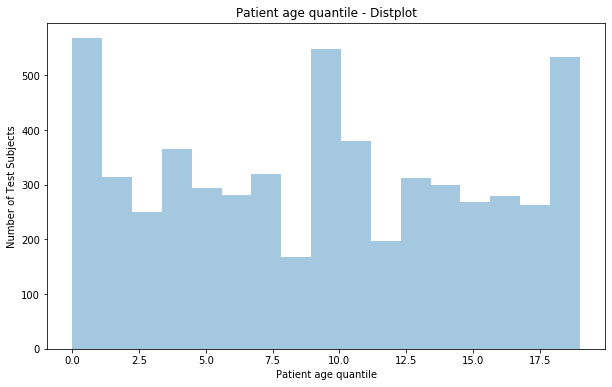

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df["Patient age quantile"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Patient age quantile')
plt.ylabel('Number of Test Subjects')
plt.title('Patient age quantile - Distplot')

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

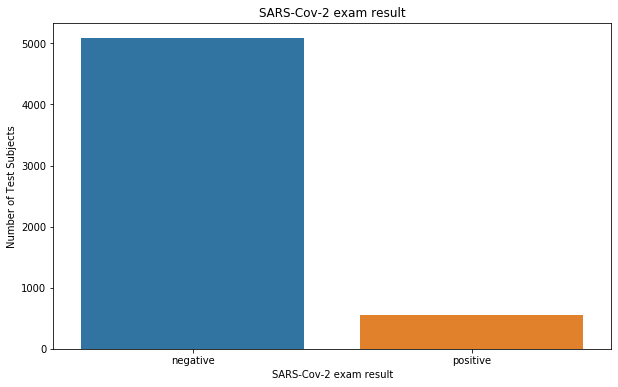

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df["SARS-Cov-2 exam result"])
plt.ylabel('Number of Test Subjects')
plt.title('SARS-Cov-2 exam result')
df["SARS-Cov-2 exam result"].value_counts()

Out of 5644 suspected patients, 558 were confirmed to have contracted COVID-19

Let us encode the categories of units for admitted patients as per severity, 0 - not admitted, 1 - regular ward, 2 - semi intensive unit, 3 - intensive care unit

In [12]:
df["Unit"] = 0

In [13]:
df['Unit'][df["Patient addmited to regular ward (1=yes, 0=no)"] == 1] = 1
df['Unit'][df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1] = 2
df['Unit'][df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1] = 3

In [14]:
df.shape

(5644, 111)

In [15]:
df.drop(columns=["Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"],axis=1,inplace=True)
df.shape

(5644, 108)

0    5474
1      79
2      50
3      41
Name: Unit, dtype: int64

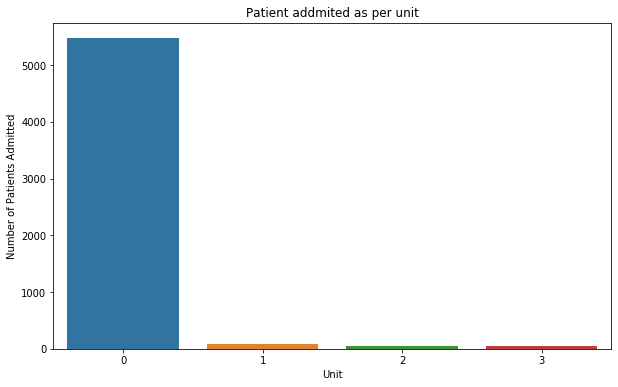

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df["Unit"])
plt.ylabel('Number of Patients Admitted')
plt.title('Patient addmited as per unit')
df["Unit"].value_counts()

Out of 5644 patients, 79 were admitted to general ward, 50 were admitted to semi intensive unit and 41 were admitted to intensive care unit

In [17]:
admitted = df[df["Unit"]!=0]

Text(0.5, 1.0, 'unit as per SARS-Cov-2 exam result - Barplot')

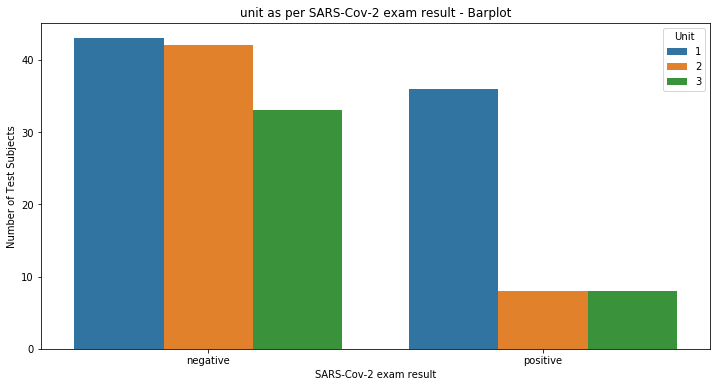

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Unit", data = admitted)
plt.ylabel('Number of Test Subjects')
plt.title('unit as per SARS-Cov-2 exam result - Barplot')

Out of the COVID-19 positive admitted patients, majority of them were admitted to General Ward

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hematocrit - Boxplot')

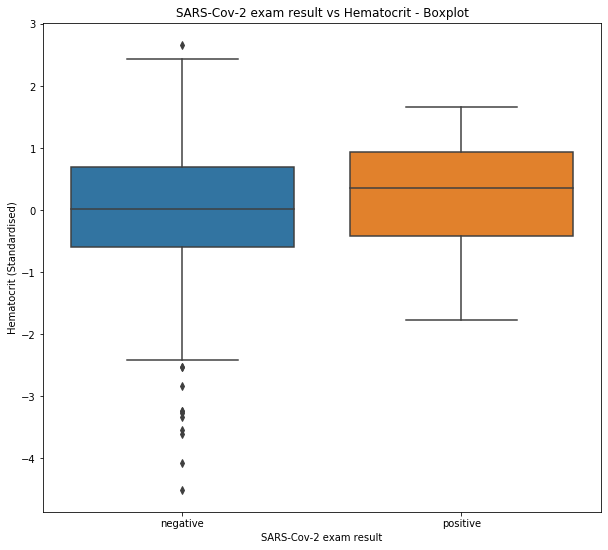

In [19]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hematocrit",data=df)
plt.ylabel("Hematocrit (Standardised)")
plt.title('SARS-Cov-2 exam result vs Hematocrit - Boxplot')

The median Hematocrit levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hemoglobin - Boxplot')

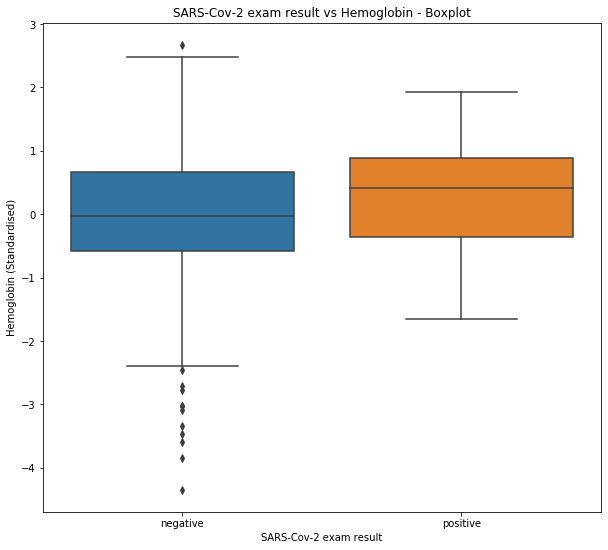

In [20]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hemoglobin",data=df)
plt.ylabel("Hemoglobin (Standardised)")
plt.title('SARS-Cov-2 exam result vs Hemoglobin - Boxplot')

The median Hemoglobin levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Platelets - Boxplot')

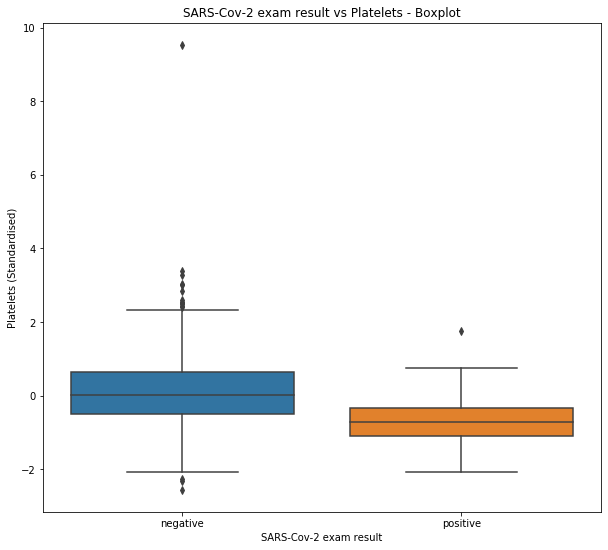

In [21]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Platelets",data=df)
plt.ylabel("Platelets (Standardised)")
plt.title('SARS-Cov-2 exam result vs Platelets - Boxplot')

The median Platelets levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean platelet volume - Boxplot')

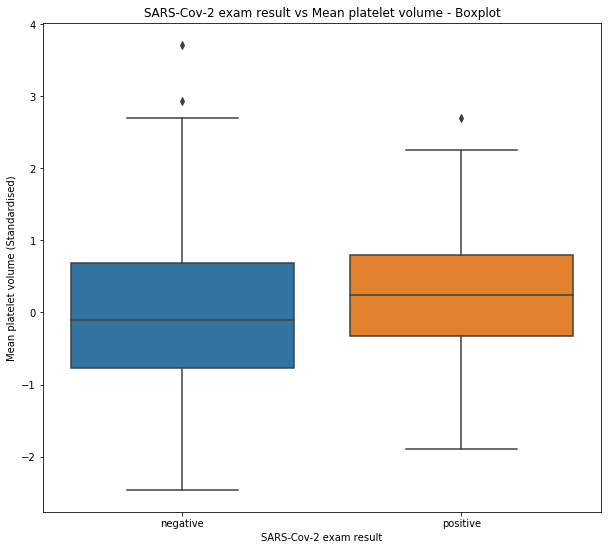

In [22]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean platelet volume ",data=df)
plt.ylabel("Mean platelet volume (Standardised)")
plt.title('SARS-Cov-2 exam result vs Mean platelet volume - Boxplot')

The median of mean platelet volume levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Red blood Cells - Boxplot')

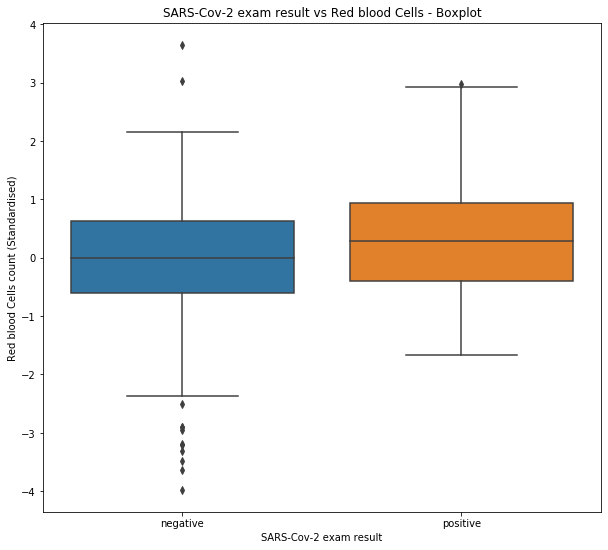

In [23]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Red blood Cells",data=df)
plt.ylabel("Red blood Cells count (Standardised)")
plt.title('SARS-Cov-2 exam result vs Red blood Cells - Boxplot')

The median Red Blood Cells levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lymphocytes - Boxplot')

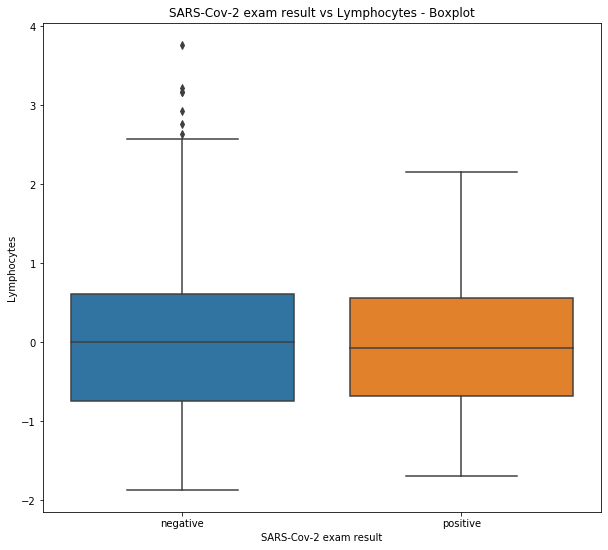

In [24]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Lymphocytes",data=df)
plt.title('SARS-Cov-2 exam result vs Lymphocytes - Boxplot')

The median Hematocrit levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean corpuscular hemoglobin concentration\xa0(MCHC) - Boxplot')

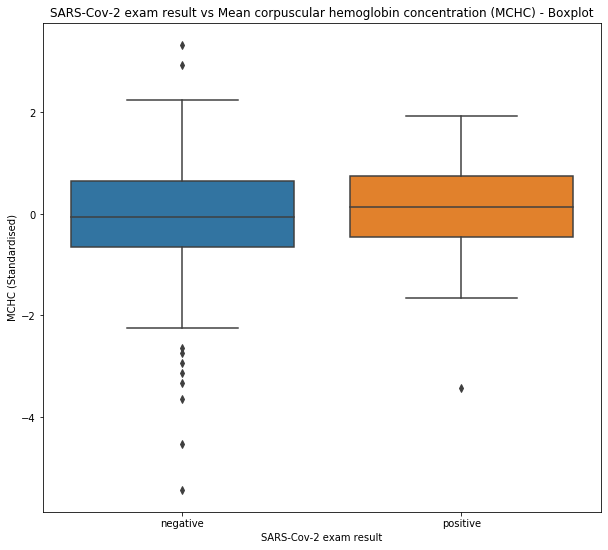

In [25]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean corpuscular hemoglobin concentration (MCHC)",data=df)
plt.ylabel("MCHC (Standardised)")
plt.title('SARS-Cov-2 exam result vs Mean corpuscular hemoglobin concentration (MCHC) - Boxplot')

The median MCHC levels were slightly higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Leukocytes - Boxplot')

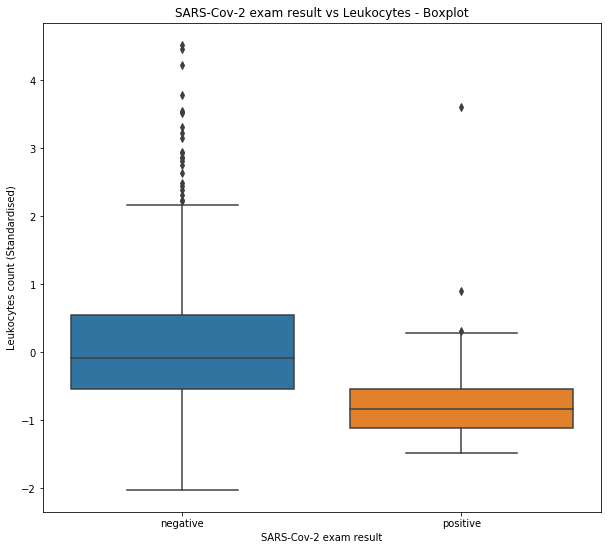

In [26]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Leukocytes",data=df)
plt.ylabel("Leukocytes count (Standardised)")
plt.title('SARS-Cov-2 exam result vs Leukocytes - Boxplot')

The median Leukocytes levels were considerably lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Basophils - Boxplot')

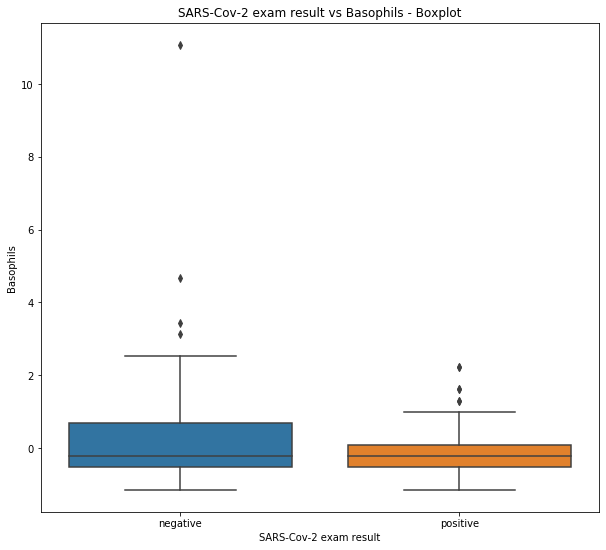

In [27]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Basophils",data=df)
plt.title('SARS-Cov-2 exam result vs Basophils - Boxplot')

The median Basophils levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean corpuscular hemoglobin (MCH) - Boxplot')

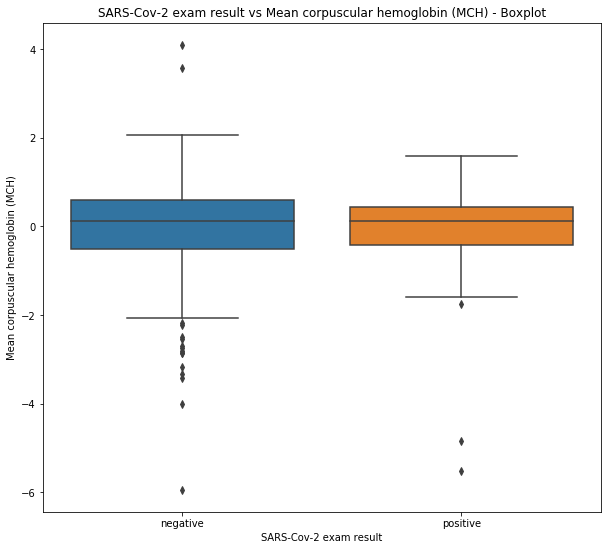

In [28]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean corpuscular hemoglobin (MCH)",data=df)
plt.title('SARS-Cov-2 exam result vs Mean corpuscular hemoglobin (MCH) - Boxplot')

The median MCH levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Eosinophils - Boxplot')

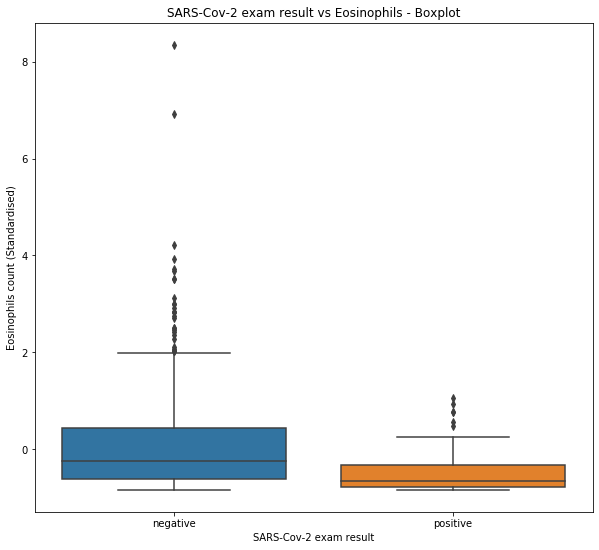

In [29]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Eosinophils",data=df)
plt.ylabel("Eosinophils count (Standardised)")
plt.title('SARS-Cov-2 exam result vs Eosinophils - Boxplot')

The median Eosinophils levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean corpuscular volume (MCV) - Boxplot')

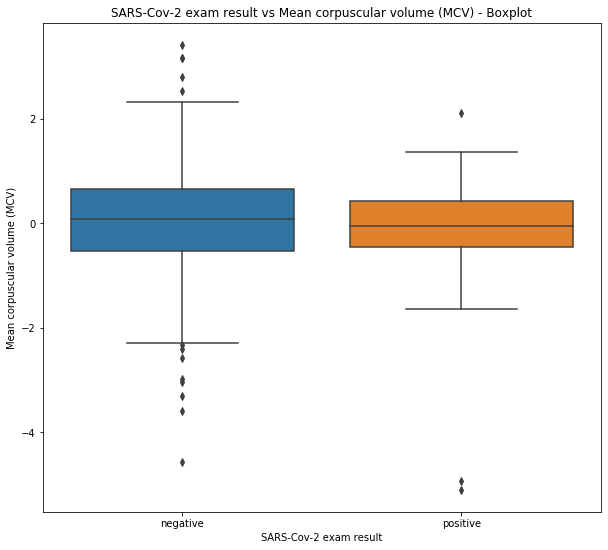

In [30]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean corpuscular volume (MCV)",data=df)
plt.title('SARS-Cov-2 exam result vs Mean corpuscular volume (MCV) - Boxplot')

The median MCV levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Monocytes - Boxplot')

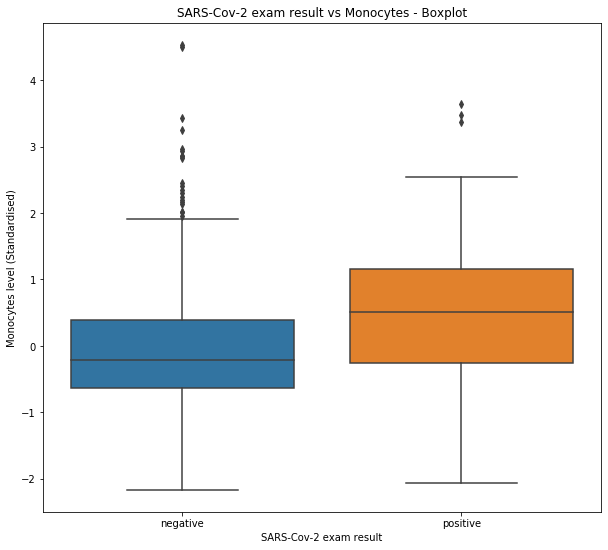

In [31]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Monocytes",data=df)
plt.ylabel("Monocytes level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Monocytes - Boxplot')

The median Monocytes levels were considerably higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Red blood cell distribution width (RDW) - Boxplot')

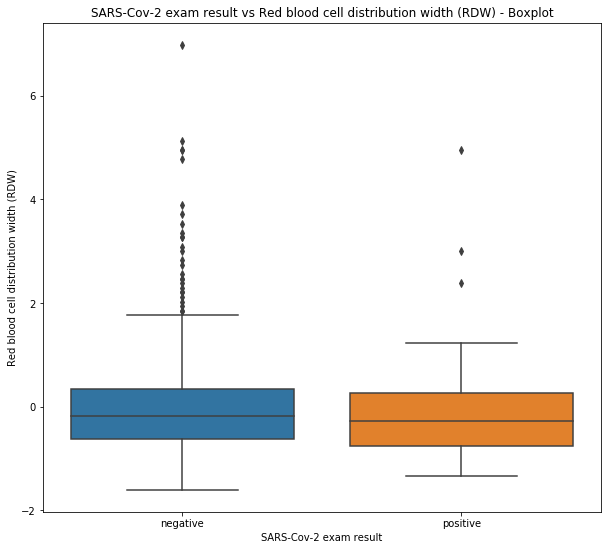

In [32]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Red blood cell distribution width (RDW)",data=df)
plt.title('SARS-Cov-2 exam result vs Red blood cell distribution width (RDW) - Boxplot')

The median RDW levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Serum Glucose - Boxplot')

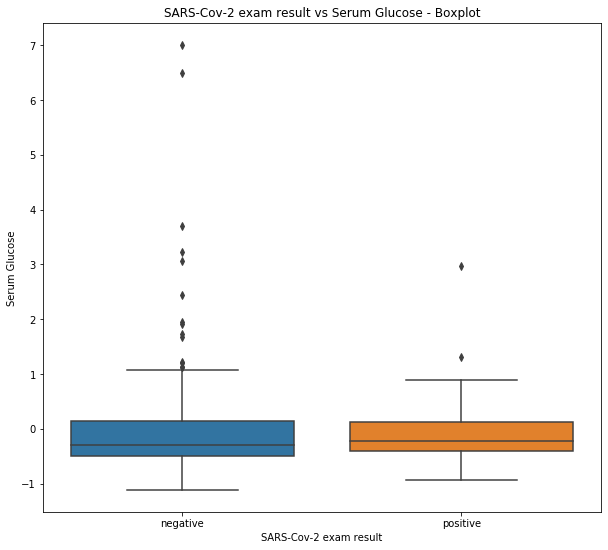

In [33]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Serum Glucose",data=df)
plt.title('SARS-Cov-2 exam result vs Serum Glucose - Boxplot')

The median serum glucose levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'Respiratory Syncytial Virus as per SARS-Cov-2 exam result - Barplot')

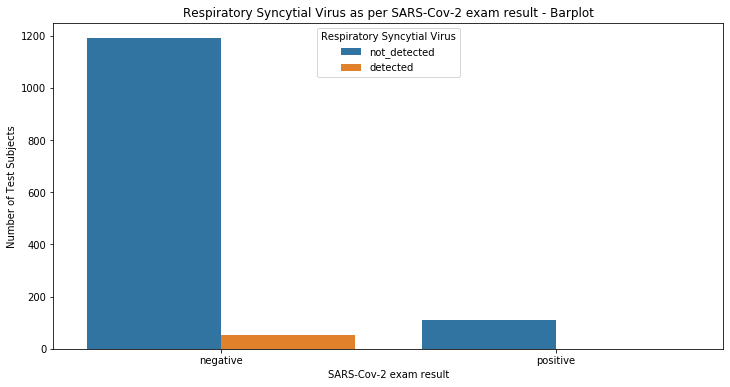

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Respiratory Syncytial Virus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Respiratory Syncytial Virus as per SARS-Cov-2 exam result - Barplot')

Respiratory Syncytial Virus were not detected for COVID-19 positive patients.

Text(0.5, 1.0, 'Influenza A as per SARS-Cov-2 exam result - Barplot')

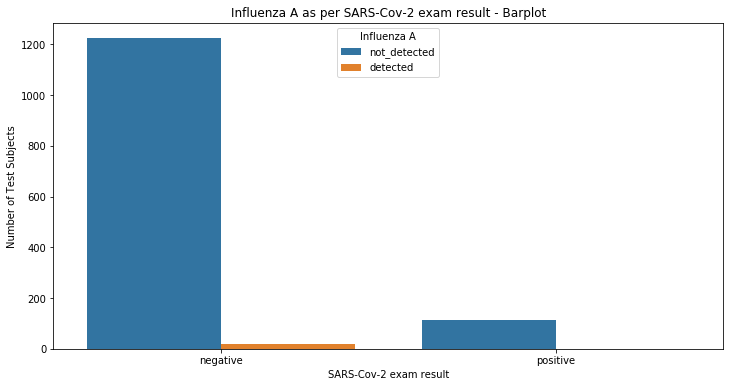

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza A", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza A as per SARS-Cov-2 exam result - Barplot')

Influenza A was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Influenza B as per SARS-Cov-2 exam result - Barplot')

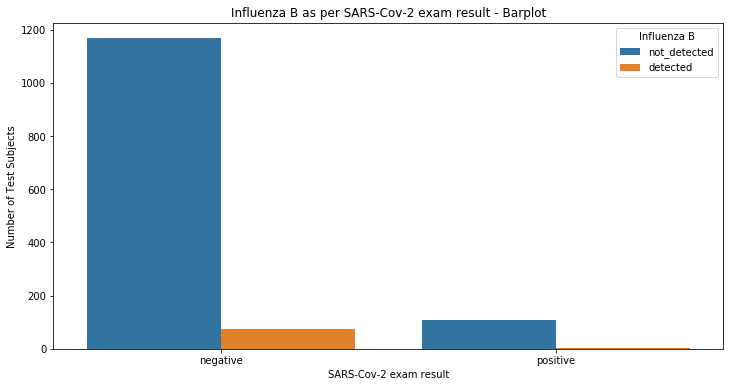

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza B", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza B as per SARS-Cov-2 exam result - Barplot')

Influenza B was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Parainfluenza 1 as per SARS-Cov-2 exam result - Barplot')

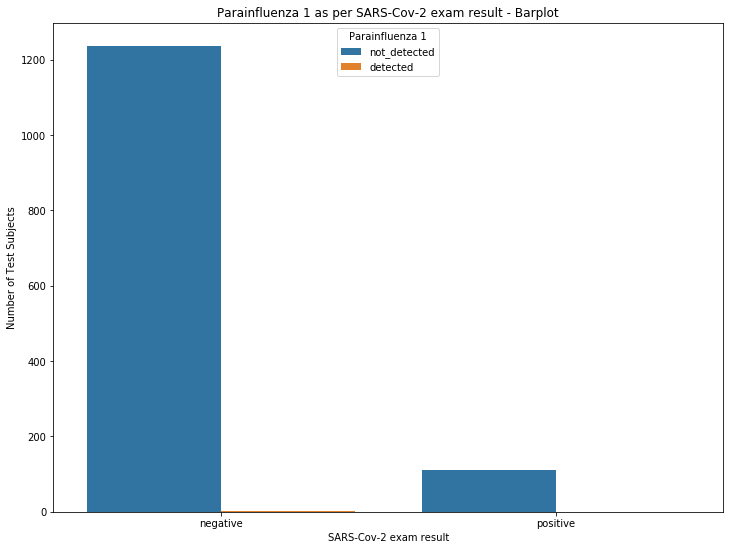

In [37]:
plt.figure(figsize=(12,9))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 1", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 1 as per SARS-Cov-2 exam result - Barplot')

Parainfluenza 1 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'CoronavirusNL63 as per SARS-Cov-2 exam result - Barplot')

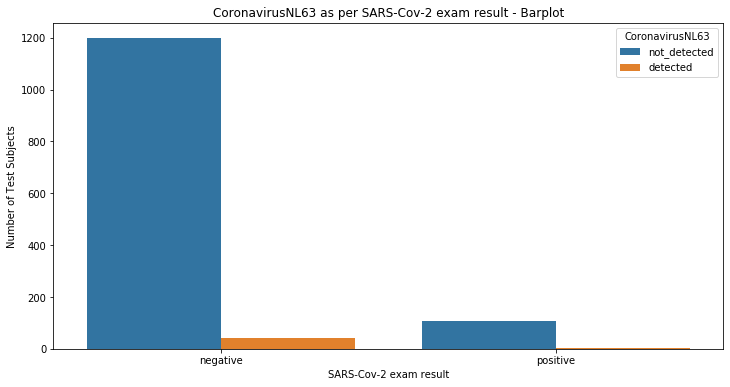

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="CoronavirusNL63", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('CoronavirusNL63 as per SARS-Cov-2 exam result - Barplot')

CoronavirusNL63 was not detected in majority of the COVID-19 positive patients.

Text(0.5, 1.0, 'Rhinovirus/Enterovirus as per SARS-Cov-2 exam result - Barplot')

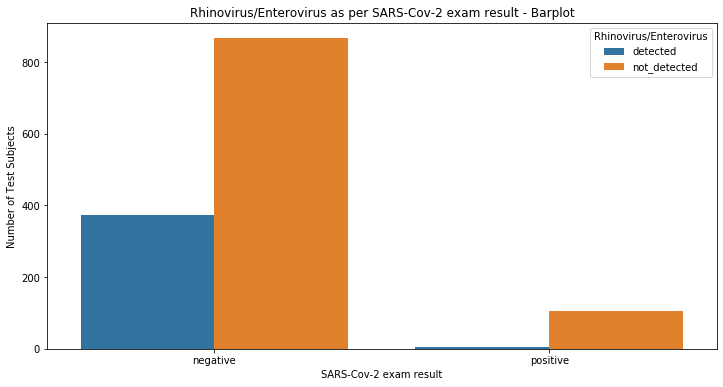

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Rhinovirus/Enterovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Rhinovirus/Enterovirus as per SARS-Cov-2 exam result - Barplot')

Rhinovirus/Enterovirus was not detected in most of the COVID-19 positive patients.

Text(0.5, 1.0, 'Coronavirus HKU1 as per SARS-Cov-2 exam result - Barplot')

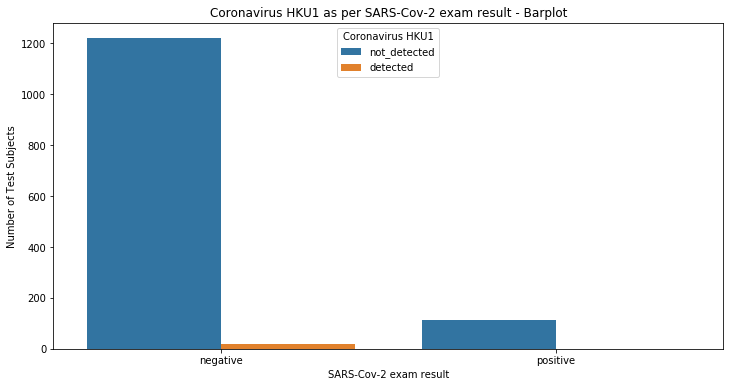

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Coronavirus HKU1", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Coronavirus HKU1 as per SARS-Cov-2 exam result - Barplot')

Coronavirus HKU1 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Parainfluenza 3 as per SARS-Cov-2 exam result - Barplot')

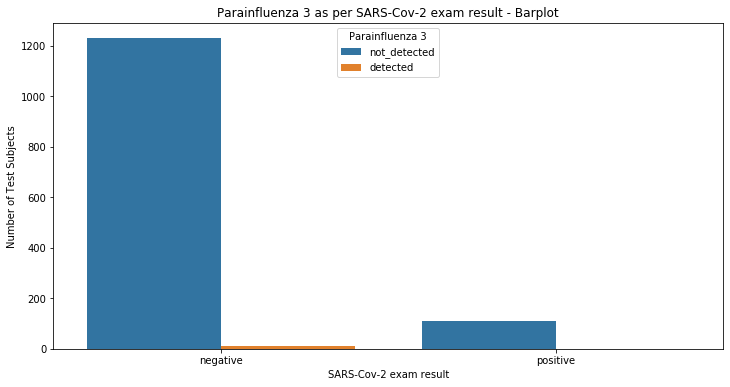

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 3", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 3 as per SARS-Cov-2 exam result - Barplot')

Parainfluenza 3 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Chlamydophila pneumoniae as per SARS-Cov-2 exam result - Barplot')

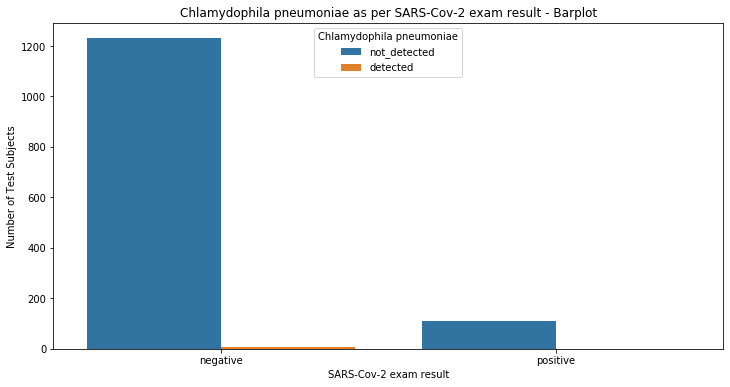

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Chlamydophila pneumoniae", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Chlamydophila pneumoniae as per SARS-Cov-2 exam result - Barplot')

Chlamydophila pneumoniae was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Adenovirus as per SARS-Cov-2 exam result - Barplot')

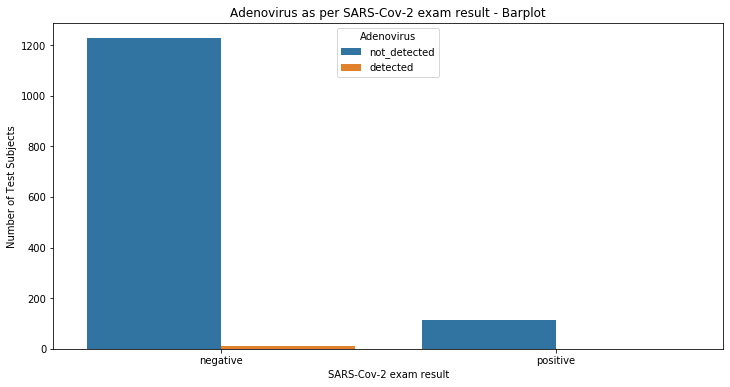

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Adenovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Adenovirus as per SARS-Cov-2 exam result - Barplot')

Adenovirus was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Parainfluenza 4 as per SARS-Cov-2 exam result - Barplot')

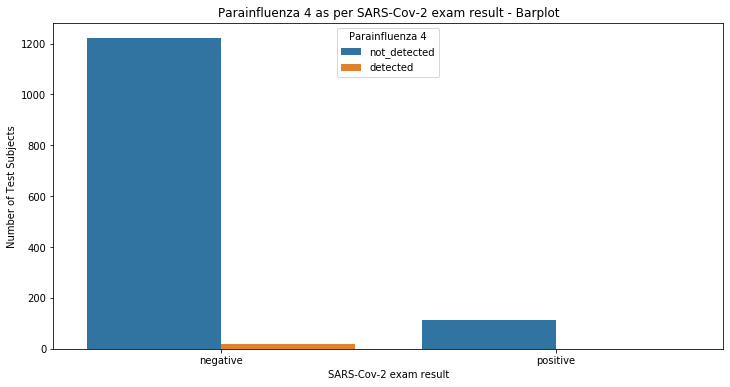

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 4", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 4 as per SARS-Cov-2 exam result - Barplot')

Parainfluenza 4 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Coronavirus229E as per SARS-Cov-2 exam result - Barplot')

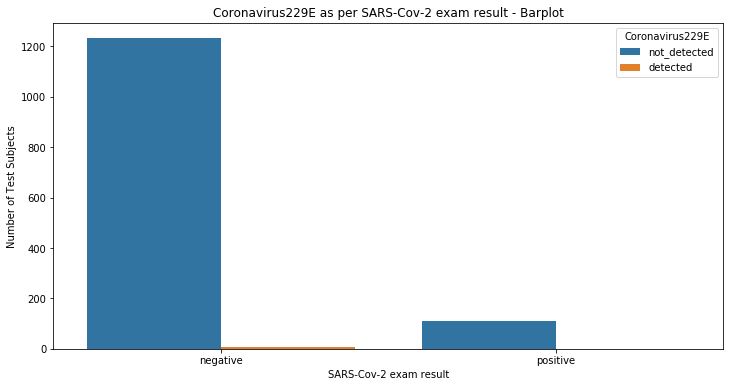

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Coronavirus229E", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Coronavirus229E as per SARS-Cov-2 exam result - Barplot')

Coronavirus229E was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'CoronavirusOC43 as per SARS-Cov-2 exam result - Barplot')

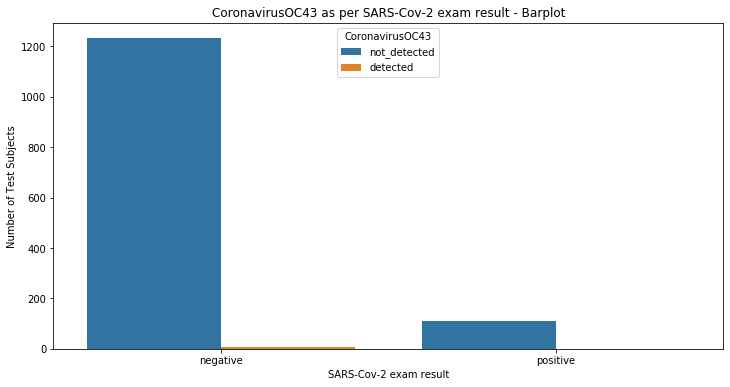

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="CoronavirusOC43", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('CoronavirusOC43 as per SARS-Cov-2 exam result - Barplot')

CoronavirusOC43 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Inf A H1N1 2009 as per SARS-Cov-2 exam result - Barplot')

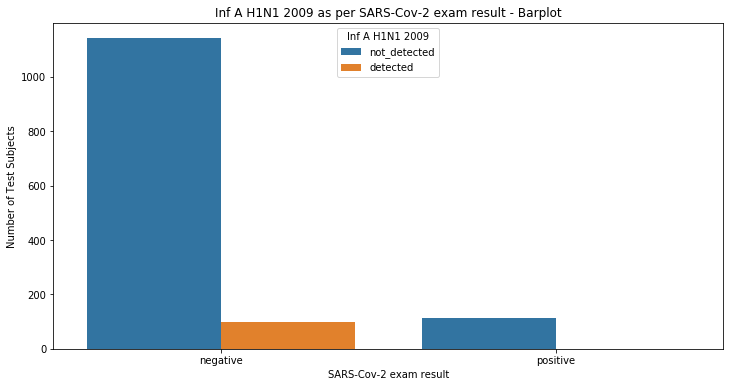

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Inf A H1N1 2009", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Inf A H1N1 2009 as per SARS-Cov-2 exam result - Barplot')

Inf A H1N1 2009 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Bordetella pertussis as per SARS-Cov-2 exam result - Barplot')

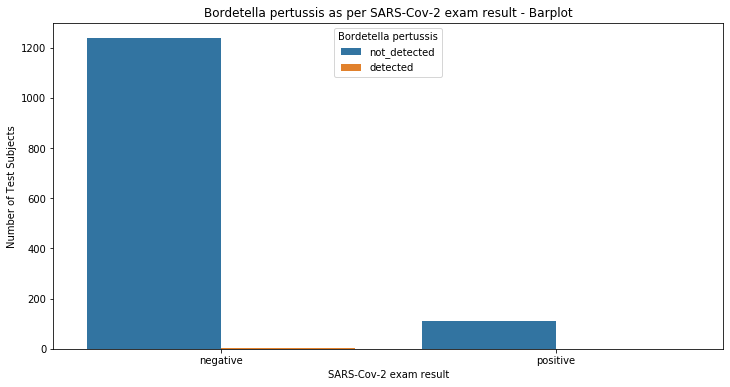

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Bordetella pertussis", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Bordetella pertussis as per SARS-Cov-2 exam result - Barplot')

Bordetella pertussis was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Metapneumovirus as per SARS-Cov-2 exam result - Barplot')

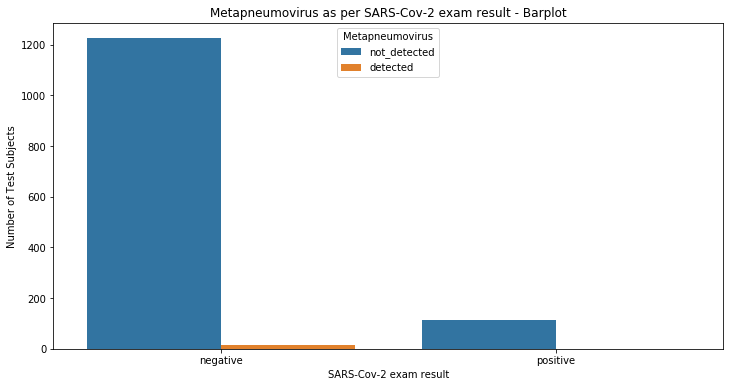

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Metapneumovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Metapneumovirus as per SARS-Cov-2 exam result - Barplot')

Metapneumovirus was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Parainfluenza 2 as per SARS-Cov-2 exam result - Barplot')

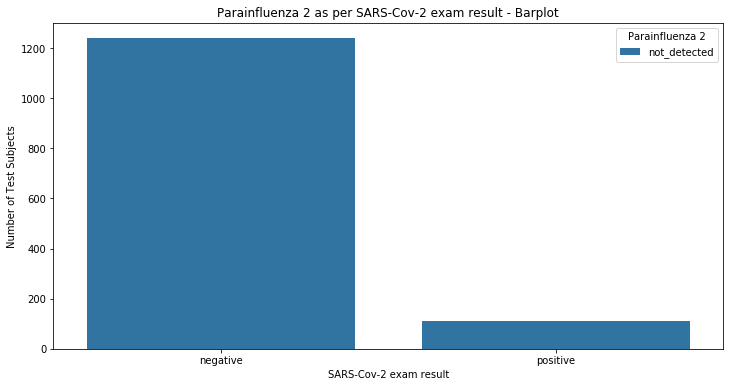

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 2", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 2 as per SARS-Cov-2 exam result - Barplot')

Parainfluenza 2 was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Neutrophils - Boxplot')

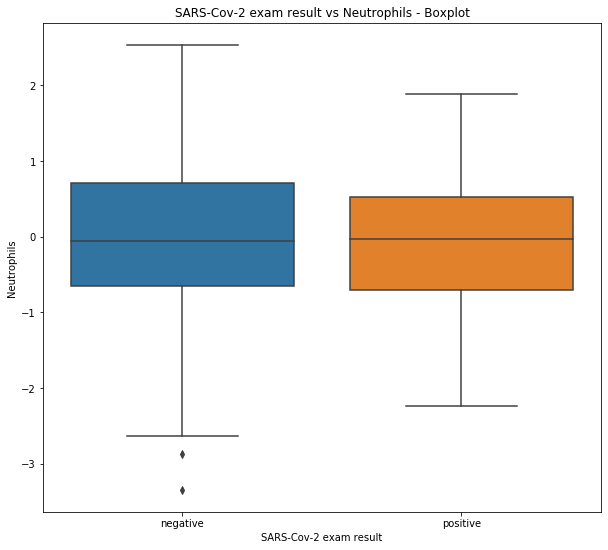

In [51]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Neutrophils",data=df)
plt.title('SARS-Cov-2 exam result vs Neutrophils - Boxplot')

The median Neutrophils levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urea - Boxplot')

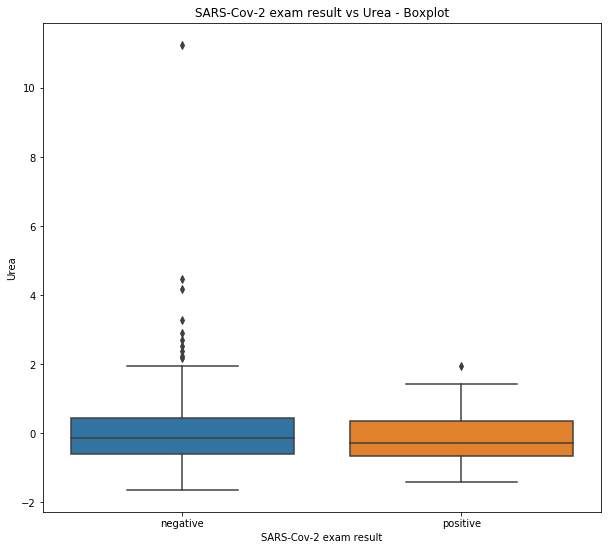

In [52]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urea",data=df)
plt.title('SARS-Cov-2 exam result vs Urea - Boxplot')

The median Urea levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs c-reactive protein - Boxplot')

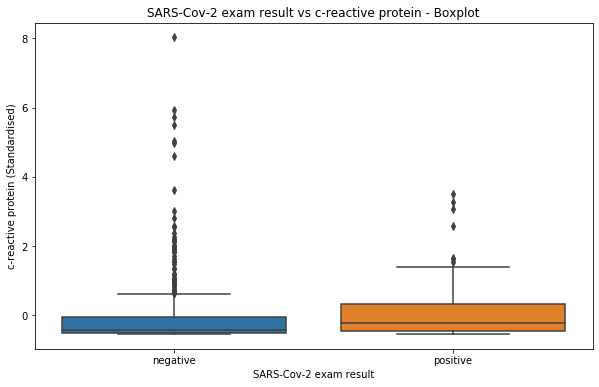

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x="SARS-Cov-2 exam result", y="Proteina C reativa mg/dL",data=df)
plt.ylabel("c-reactive protein (Standardised)")
plt.title('SARS-Cov-2 exam result vs c-reactive protein - Boxplot')

The median Proteina C reativa mg/dL levels were relatively higher for COVID-19 patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Creatinine - Boxplot')

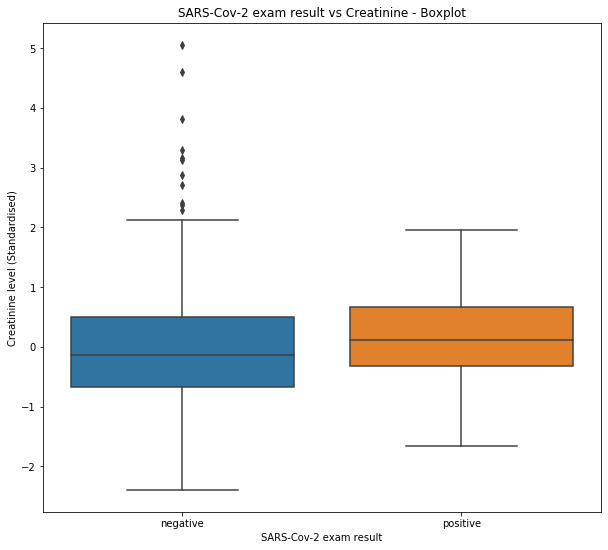

In [54]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Creatinine",data=df)
plt.ylabel("Creatinine level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Creatinine - Boxplot')

The median Creatinine levels were relatively slightly higher for COVID-19 patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Potassium - Boxplot')

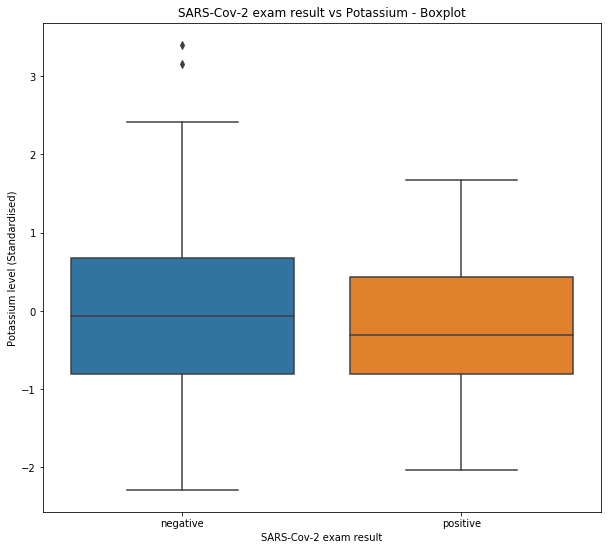

In [55]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Potassium",data=df)
plt.ylabel("Potassium level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Potassium - Boxplot')

The median Potassium levels were relatively lower for COVID-19 patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Sodium - Boxplot')

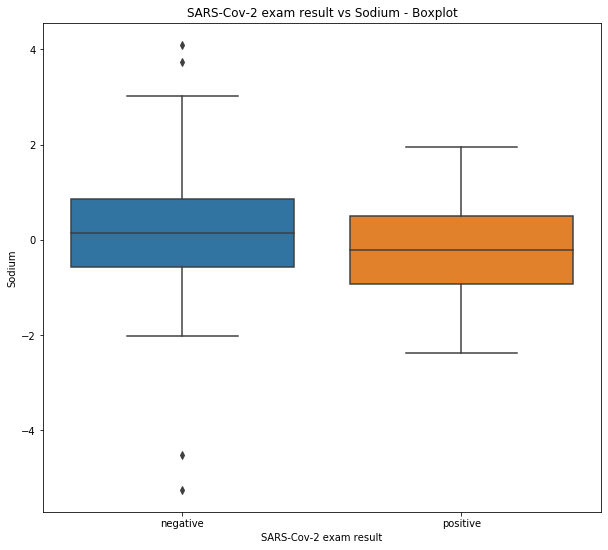

In [56]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Sodium",data=df)
plt.title('SARS-Cov-2 exam result vs Sodium - Boxplot')

The median Sodium levels were relatively lower for COVID-19 patients.

Text(0.5, 1.0, 'Influenza B, rapid test as per SARS-Cov-2 exam result - Barplot')

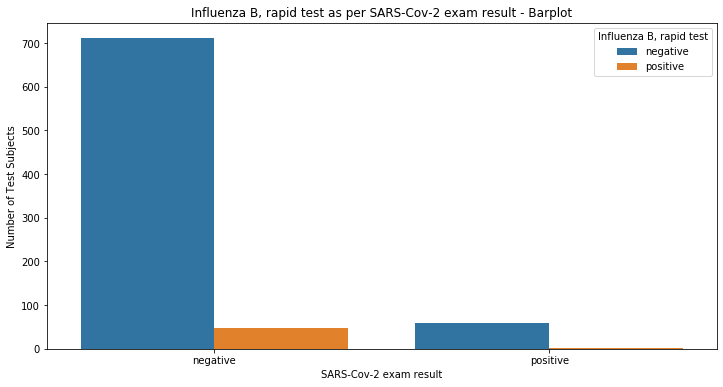

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza B, rapid test", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza B, rapid test as per SARS-Cov-2 exam result - Barplot')

Influenza B was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Influenza A, rapid test as per SARS-Cov-2 exam result - Barplot')

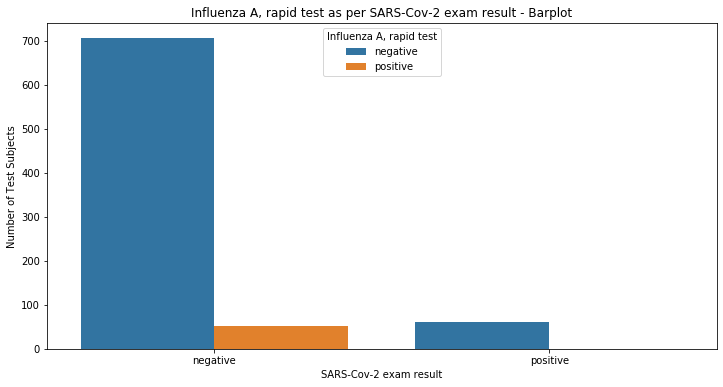

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza A, rapid test", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza A, rapid test as per SARS-Cov-2 exam result - Barplot')

Influenza A was not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Alanine transaminase - Boxplot')

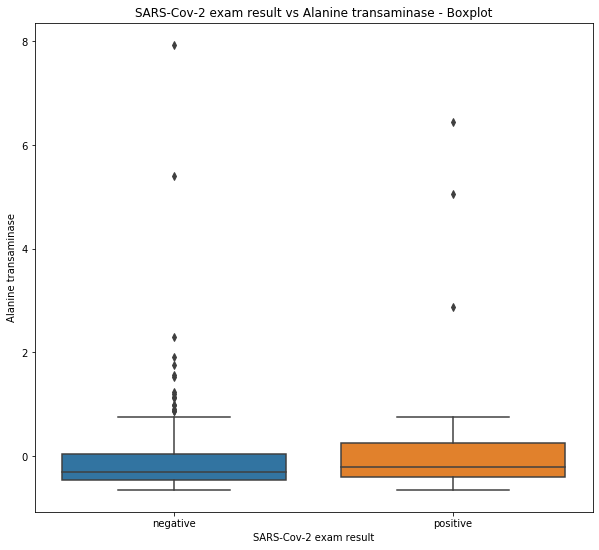

In [59]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Alanine transaminase",data=df)

plt.title('SARS-Cov-2 exam result vs Alanine transaminase - Boxplot')

The median Alanine transaminase levels were relatively slightly higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Aspartate transaminase - Boxplot')

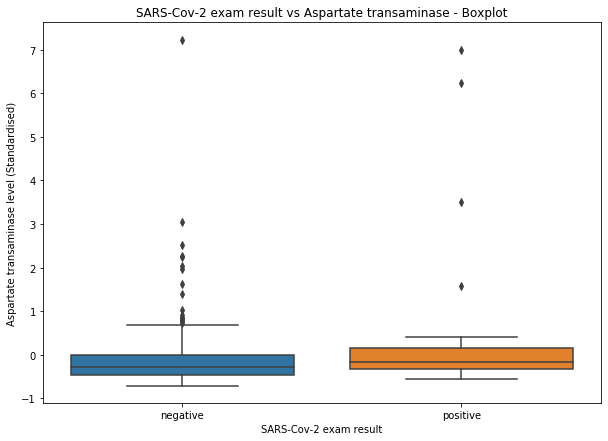

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x="SARS-Cov-2 exam result", y="Aspartate transaminase",data=df)
plt.ylabel("Aspartate transaminase level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Aspartate transaminase - Boxplot')

The median Aspartate transaminase levels were relatively slightly higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Gamma-glutamyltransferase\xa0 - Boxplot')

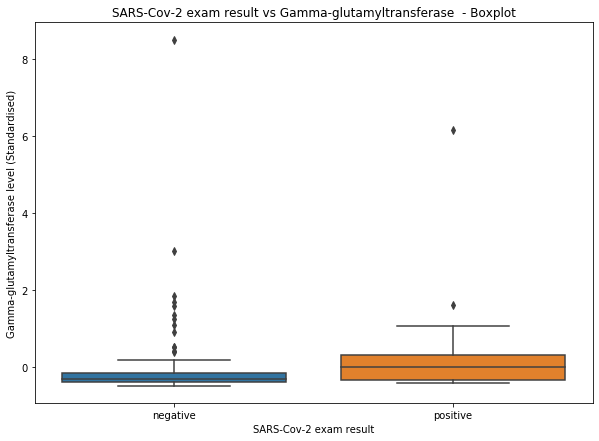

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(x="SARS-Cov-2 exam result", y="Gamma-glutamyltransferase ",data=df)
plt.ylabel("Gamma-glutamyltransferase level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Gamma-glutamyltransferase  - Boxplot')

The median Aspartate transaminase levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total Bilirubin - Boxplot')

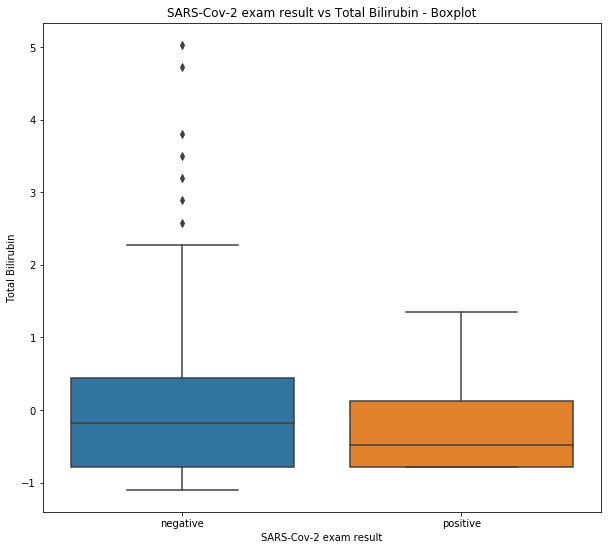

In [62]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Total Bilirubin - Boxplot')

The median Total Bilirubin levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Direct Bilirubin - Boxplot')

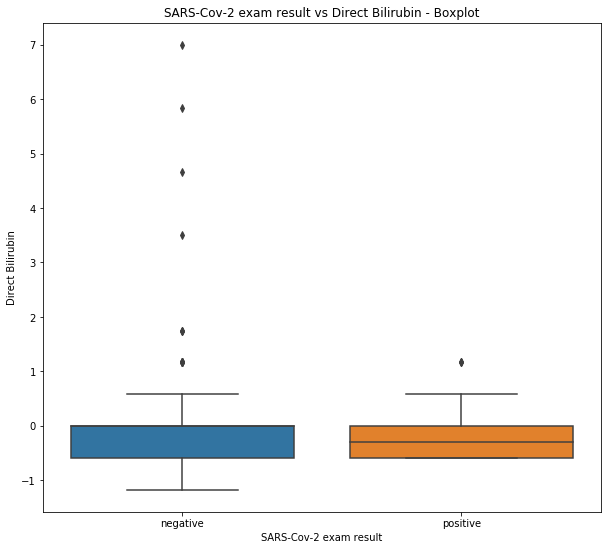

In [63]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Direct Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Direct Bilirubin - Boxplot')

The median direct Bilirubin levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Indirect Bilirubin - Boxplot')

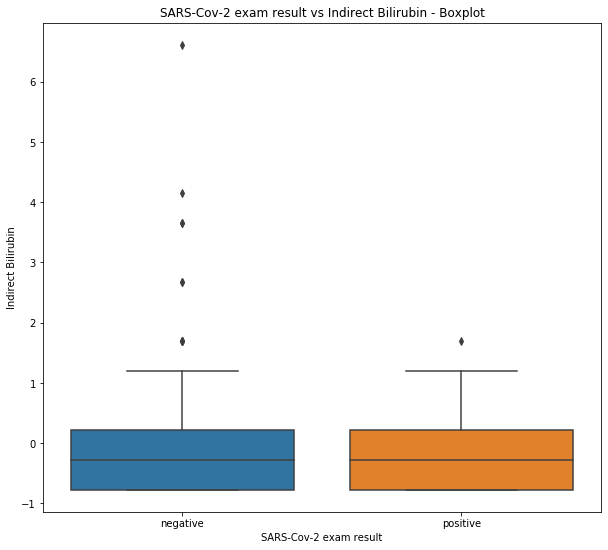

In [64]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Indirect Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Indirect Bilirubin - Boxplot')

The median Indirect Bilirubin levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Alkaline phosphatase - Boxplot')

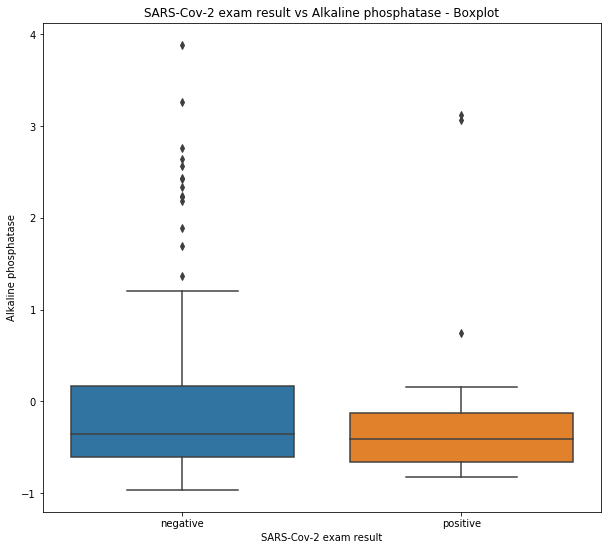

In [65]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Alkaline phosphatase",data=df)
plt.title('SARS-Cov-2 exam result vs Alkaline phosphatase - Boxplot')

The median Alkaline phosphatase levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Ionized calcium\xa0 - Boxplot')

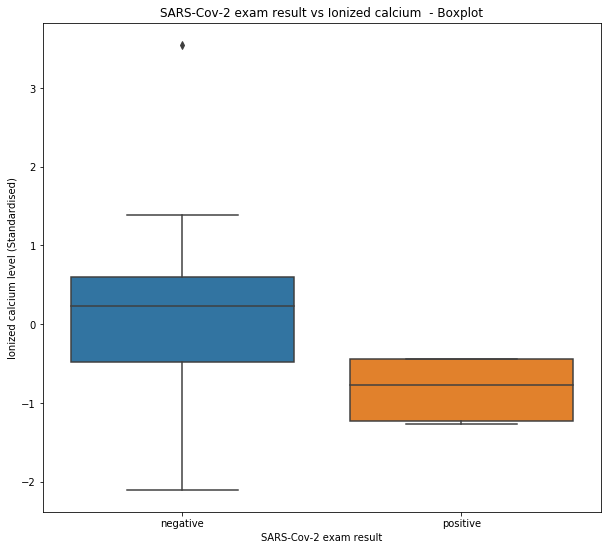

In [66]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Ionized calcium ",data=df)
plt.ylabel("Ionized calcium level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Ionized calcium  - Boxplot')

The median Ionized calcium levels were considerably lower for COVID-19 positive patients.

Text(0.5, 1.0, 'Strepto A as per SARS-Cov-2 exam result - Barplot')

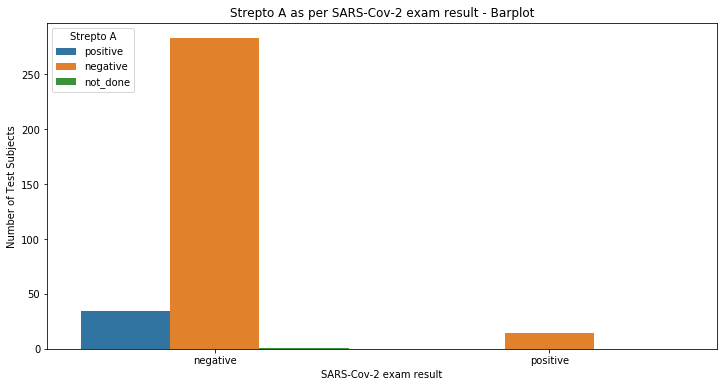

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Strepto A", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Strepto A as per SARS-Cov-2 exam result - Barplot')

Strepto A was not found positive among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Magnesium - Boxplot')

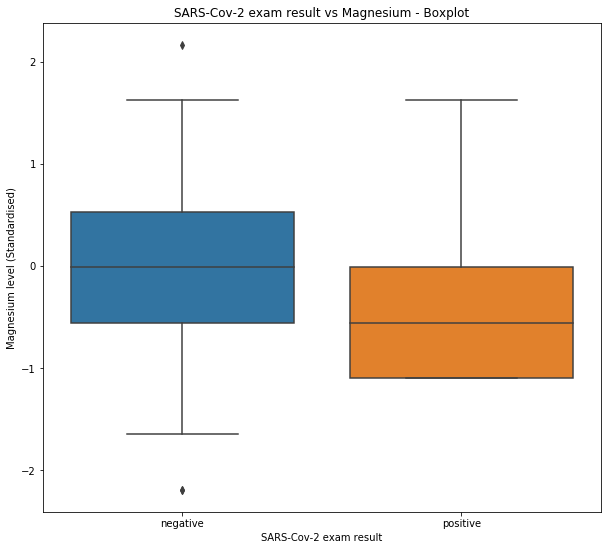

In [68]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Magnesium",data=df)
plt.ylabel("Magnesium level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Magnesium - Boxplot')

The median Magnesium levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pCO2 (venous blood gas analysis) - Boxplot')

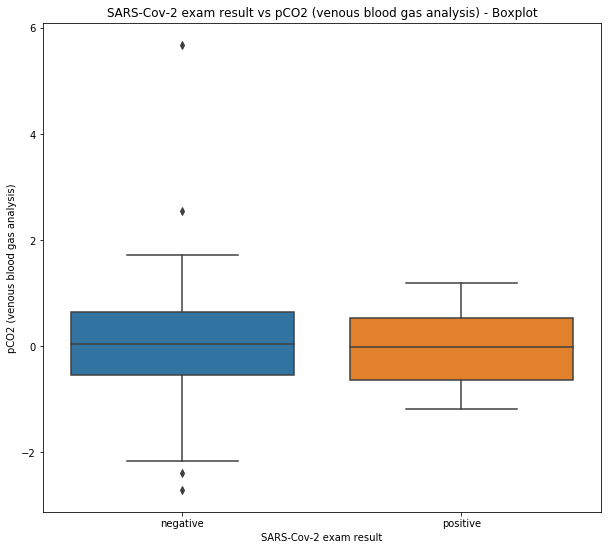

In [100]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pCO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pCO2 (venous blood gas analysis) - Boxplot')

The median pCO2 (venous blood gas analysis) levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hb saturation (venous blood gas analysis) - Boxplot')

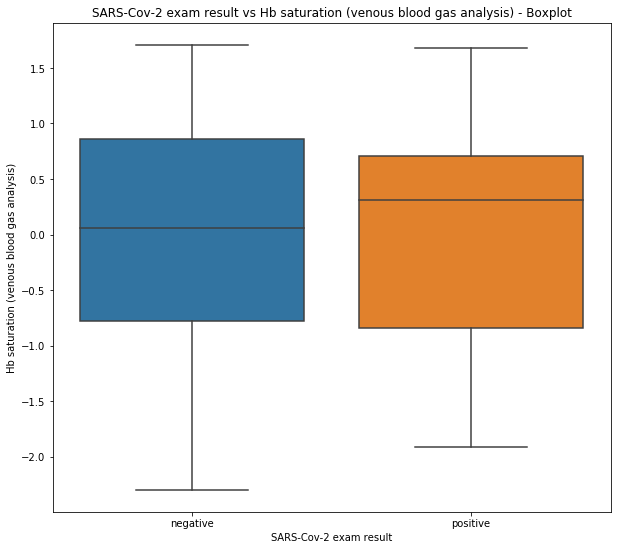

In [101]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hb saturation (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Hb saturation (venous blood gas analysis) - Boxplot')

The median Hb saturation (venous blood gas analysis) were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Base excess (venous blood gas analysis) - Boxplot')

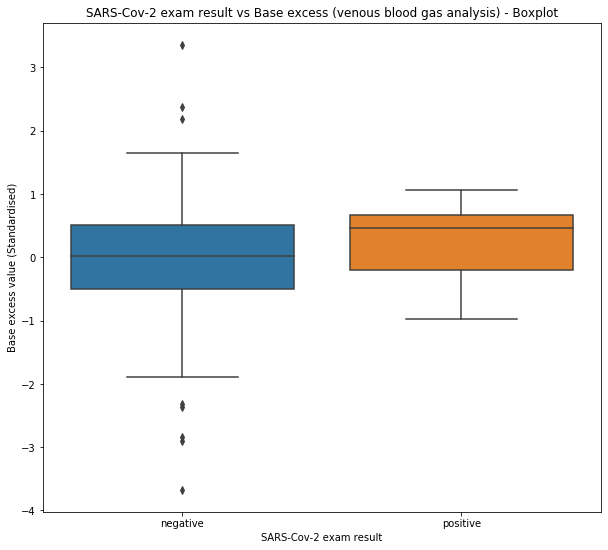

In [102]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Base excess (venous blood gas analysis)",data=df)
plt.ylabel("Base excess value (Standardised)")
plt.title('SARS-Cov-2 exam result vs Base excess (venous blood gas analysis) - Boxplot')

The median Base excess (venous blood gas analysis) were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pO2 (venous blood gas analysis) - Boxplot')

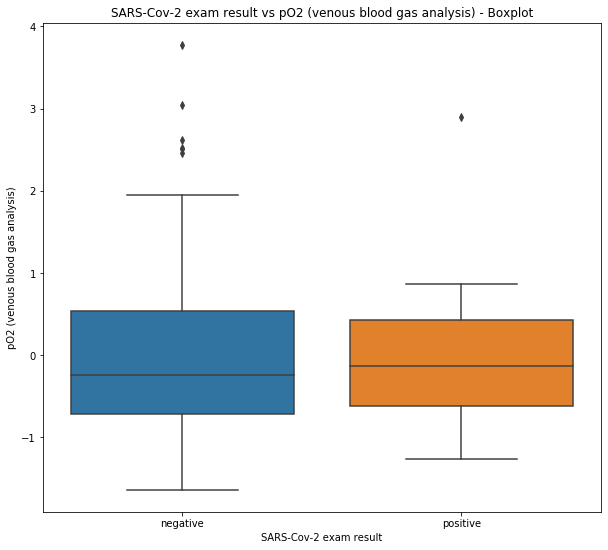

In [103]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pO2 (venous blood gas analysis) - Boxplot')

The median pO2 (venous blood gas analysis) levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total CO2 (venous blood gas analysis) - Boxplot')

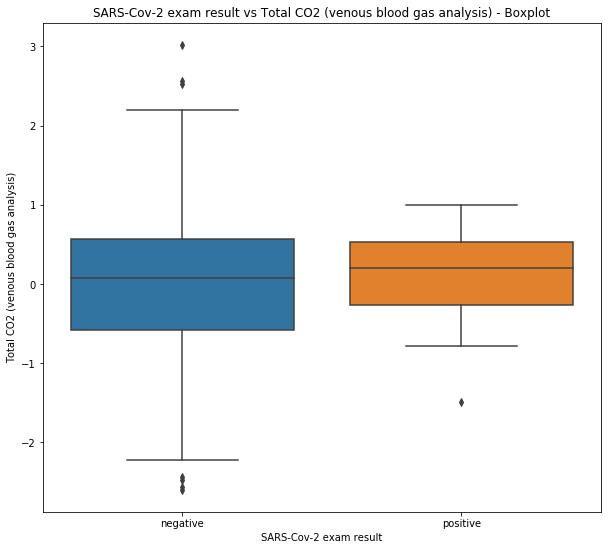

In [104]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total CO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Total CO2 (venous blood gas analysis) - Boxplot')

The median Total CO2 (venous blood gas analysis) were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pH (venous blood gas analysis) - Boxplot')

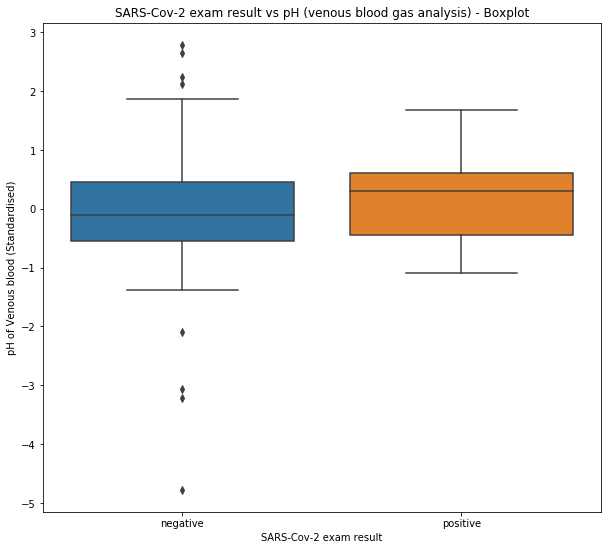

In [105]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pH (venous blood gas analysis)",data=df)
plt.ylabel("pH of Venous blood (Standardised)")
plt.title('SARS-Cov-2 exam result vs pH (venous blood gas analysis) - Boxplot')

The median pH (venous blood gas analysis) were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs HCO3 (venous blood gas analysis) - Boxplot')

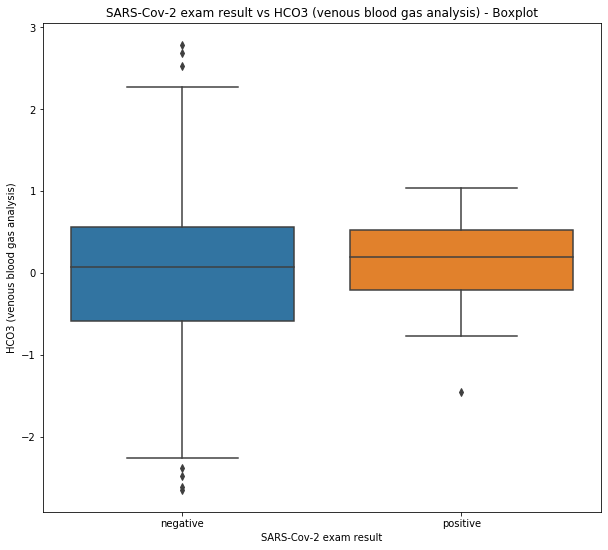

In [106]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="HCO3 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs HCO3 (venous blood gas analysis) - Boxplot')

The median HCO3 (venous blood gas analysis) were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Rods # - Boxplot')

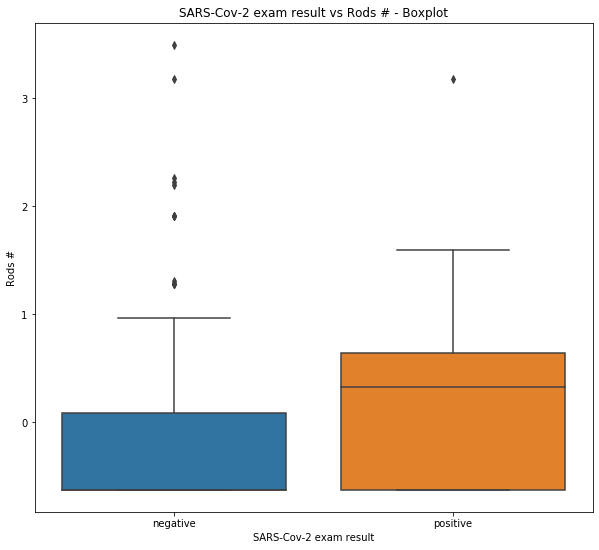

In [107]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Rods #",data=df)
plt.title('SARS-Cov-2 exam result vs Rods # - Boxplot')

The median Rods # levels were considerably higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Segmented - Boxplot')

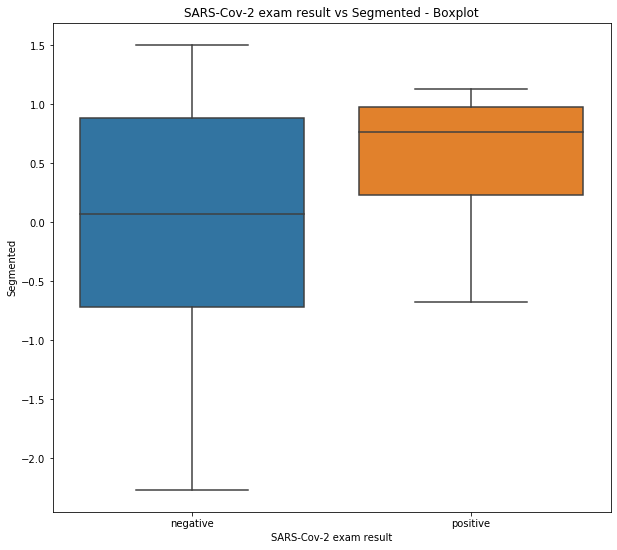

In [108]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Segmented",data=df)
plt.title('SARS-Cov-2 exam result vs Segmented - Boxplot')

The median Segmented levels were considerably higher for COVID-19 positive patients.

Text(0.5, 1.0, 'Promyelocytes level as per SARS-Cov-2 exam result - Barplot')

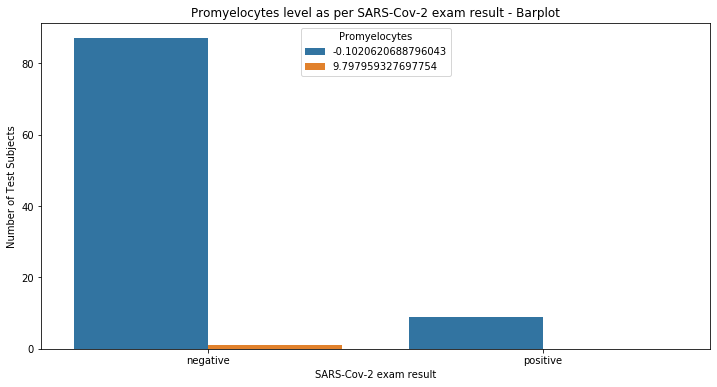

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Promyelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Promyelocytes level as per SARS-Cov-2 exam result - Barplot')

Higher levels of Promyelocytes were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Metamyelocytes level as per SARS-Cov-2 exam result - Barplot')

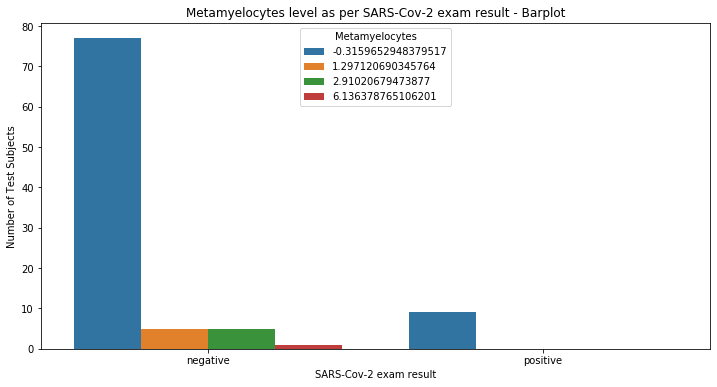

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Metamyelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Metamyelocytes level as per SARS-Cov-2 exam result - Barplot')

Higher levels of Metamyelocytes were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Myelocytes level as per SARS-Cov-2 exam result - Barplot')

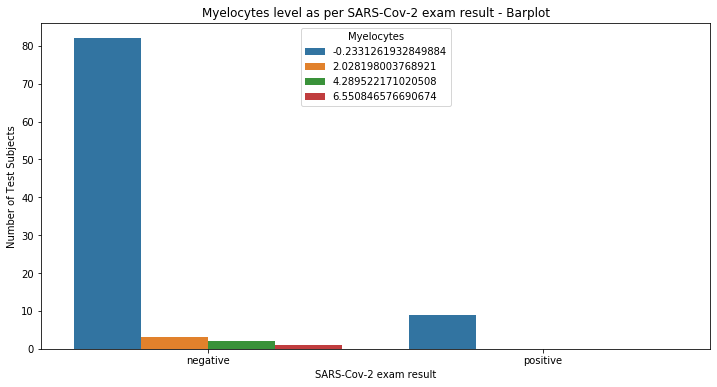

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Myelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Myelocytes level as per SARS-Cov-2 exam result - Barplot')

Higher levels of Myelocytes were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Esterase as per SARS-Cov-2 exam result - Barplot')

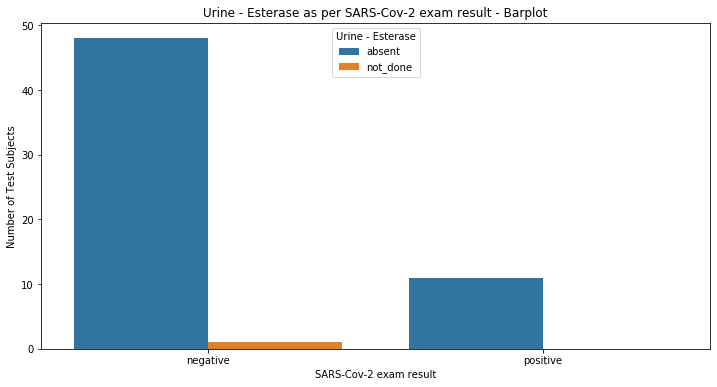

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Esterase", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Esterase as per SARS-Cov-2 exam result - Barplot')

Urine - Esterase were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Aspect as per SARS-Cov-2 exam result - Barplot')

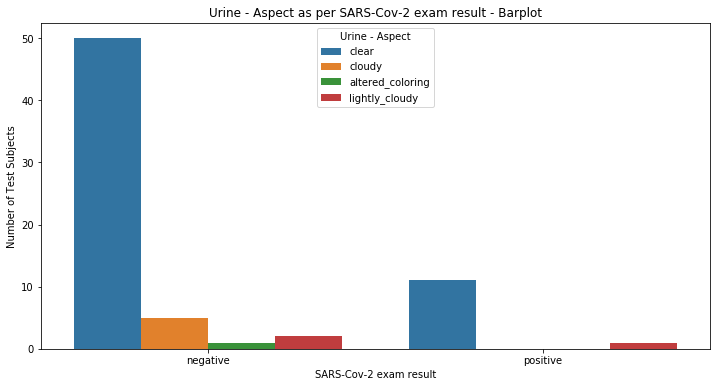

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Aspect", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Aspect as per SARS-Cov-2 exam result - Barplot')

Urine aspect cloudy and altered coloring were not detected among COVID-19 positive patients.

In [69]:
df["Urine - pH"].value_counts()

5.0              14
7.0               8
5                 8
6.0               7
6                 6
6.5               5
6.5               5
7                 4
7.5               3
5                 3
5.5               2
5.5               2
Não Realizado     1
6                 1
8.0               1
Name: Urine - pH, dtype: int64

In [70]:
df["Urine - pH"].replace('Não Realizado', np.NaN,inplace=True)

In [71]:
df["Urine - pH"].astype(float)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5639    NaN
5640    NaN
5641    NaN
5642    5.0
5643    NaN
Name: Urine - pH, Length: 5644, dtype: float64

Text(0.5, 1.0, 'Urine - pH as per SARS-Cov-2 exam result - Barplot')

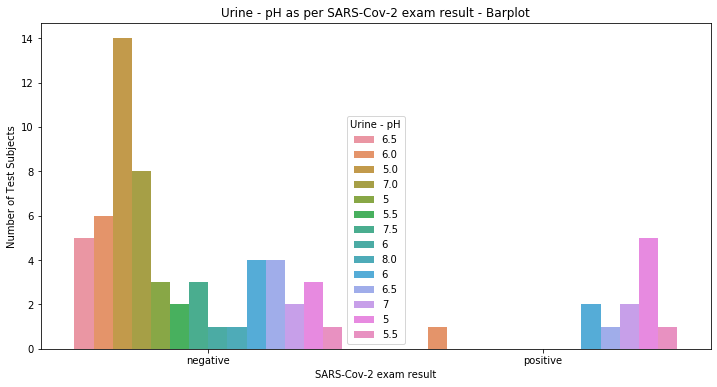

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - pH", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - pH as per SARS-Cov-2 exam result - Barplot')

Majority of the COVID-19 positive patients had relatively lower Urine pH values.

Text(0.5, 1.0, 'Urine - Hemoglobin as per SARS-Cov-2 exam result - Barplot')

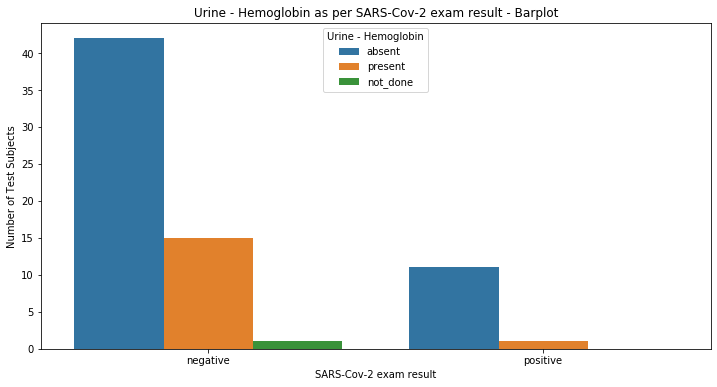

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Hemoglobin", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Hemoglobin as per SARS-Cov-2 exam result - Barplot')

Very Few COVID-19 positive patients had presence of Urine - Hemoglobin

Text(0.5, 1.0, 'Urine - Bile pigments as per SARS-Cov-2 exam result - Barplot')

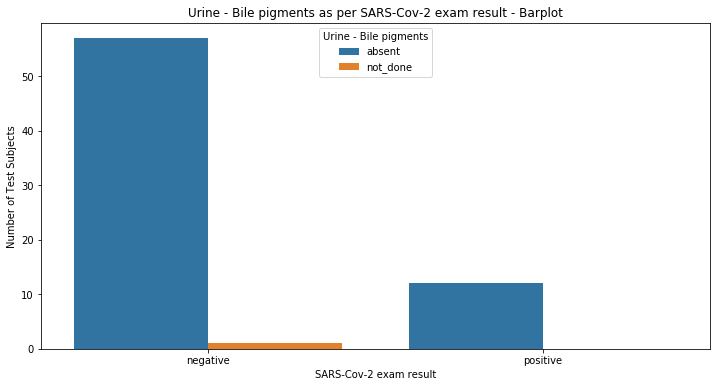

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Bile pigments", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Bile pigments as per SARS-Cov-2 exam result - Barplot')

Urine - Bile pigments were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Ketone Bodies as per SARS-Cov-2 exam result - Barplot')

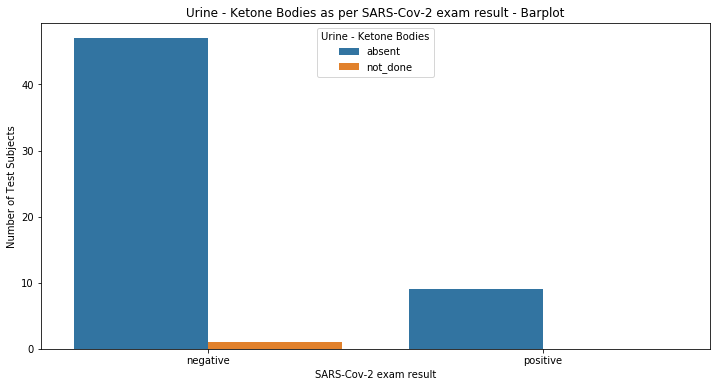

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Ketone Bodies", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Ketone Bodies as per SARS-Cov-2 exam result - Barplot')

Urine - Ketone Bodies were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urine - Density - Boxplot')

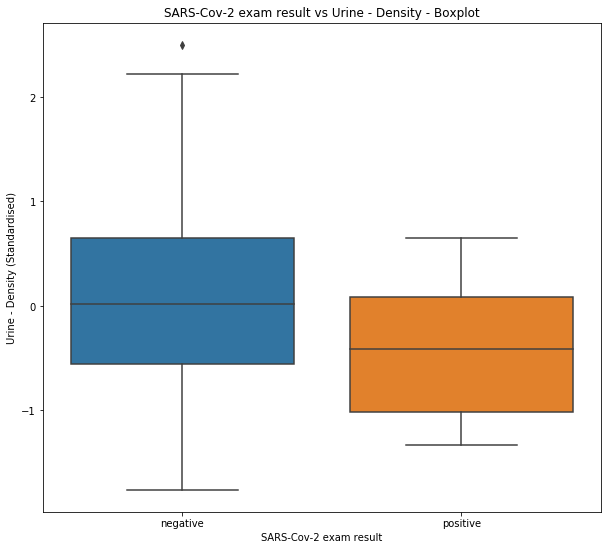

In [121]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urine - Density",data=df)
plt.ylabel('Urine - Density (Standardised)')
plt.title('SARS-Cov-2 exam result vs Urine - Density - Boxplot')

The Urine - Density levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Urobilinogen as per SARS-Cov-2 exam result - Barplot')

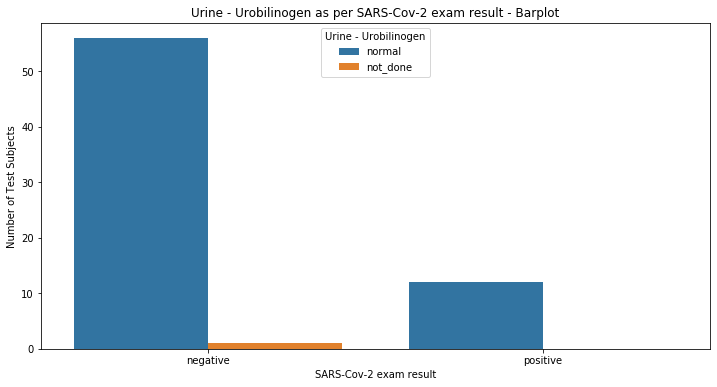

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Urobilinogen", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Urobilinogen as per SARS-Cov-2 exam result - Barplot')

Urine - Urobilinogen is normal for all COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Protein as per SARS-Cov-2 exam result - Barplot')

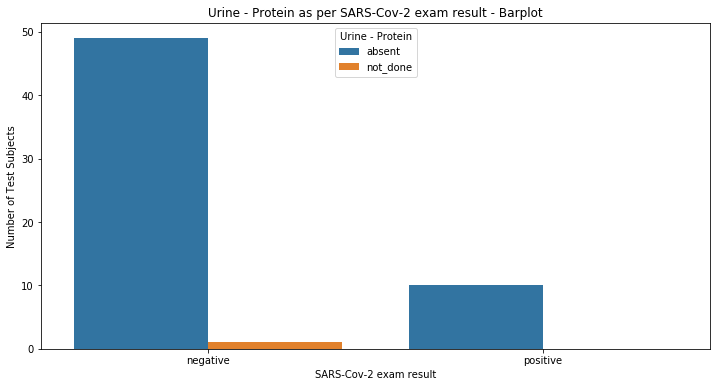

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Protein", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Protein as per SARS-Cov-2 exam result - Barplot')

Urine - Protein were not detected among COVID-19 positive patients.

In [75]:
df["Urine - Leukocytes"].nunique()

31

In [76]:
df["Urine - Leukocytes"].value_counts()

<1000      9
3000       9
4000       7
2000       7
1000       4
8000       3
5000       2
38000      2
10000      2
7000       2
29000      2
22000      2
229000     1
43000      1
2600       1
5300       1
32000      1
3310000    1
6000       1
23000      1
40000      1
77000      1
16000      1
4600       1
124000     1
10600      1
28000      1
2500       1
19000      1
5942000    1
624000     1
Name: Urine - Leukocytes, dtype: int64

In [77]:
df["Urine - Leukocytes"].replace('<1000', 700,inplace=True) #Assumption for the model and analysis

In [78]:
df["Urine - Leukocytes"].astype(float)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5639        NaN
5640        NaN
5641        NaN
5642    29000.0
5643        NaN
Name: Urine - Leukocytes, Length: 5644, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

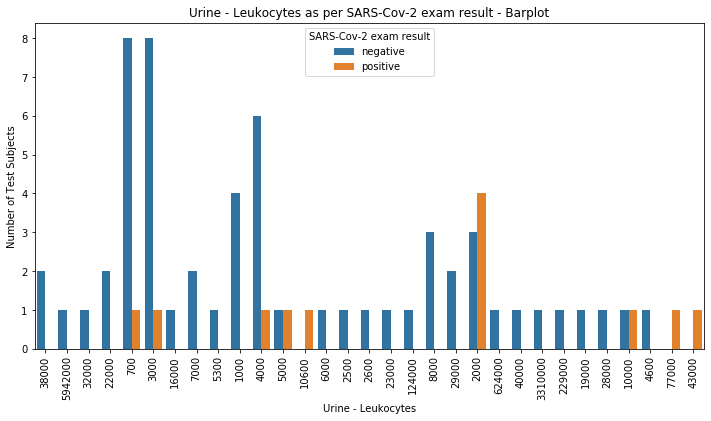

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x="Urine - Leukocytes",hue="SARS-Cov-2 exam result", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Leukocytes as per SARS-Cov-2 exam result - Barplot')
plt.xticks(rotation=90)

Majority of the patients who had Urine - Leukocytes level of 2000 were COVID-19 positive.

Text(0.5, 1.0, 'Urine - Crystals as per SARS-Cov-2 exam result - Barplot')

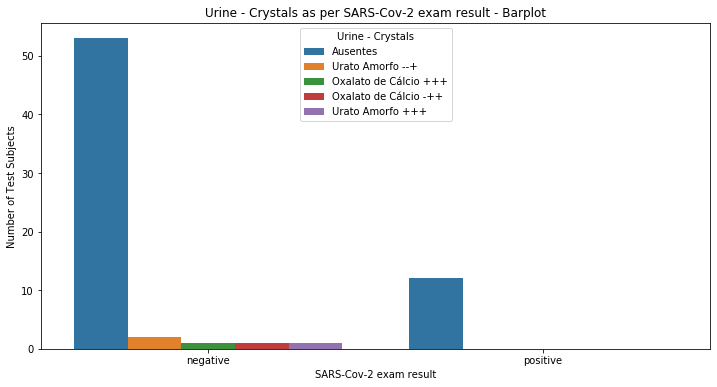

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Crystals", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Crystals as per SARS-Cov-2 exam result - Barplot')

Urine - Crystals were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urine - Red blood cells - Boxplot')

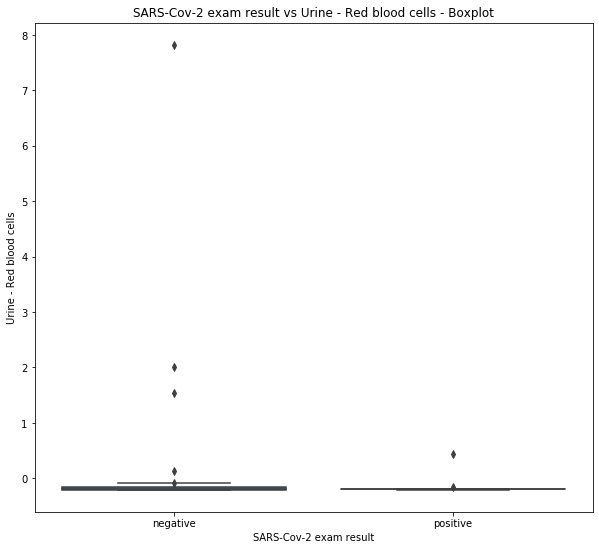

In [81]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urine - Red blood cells",data=df)
plt.title('SARS-Cov-2 exam result vs Urine - Red blood cells - Boxplot')

The median Urine - Red blood cells levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Hyaline cylinders as per SARS-Cov-2 exam result - Barplot')

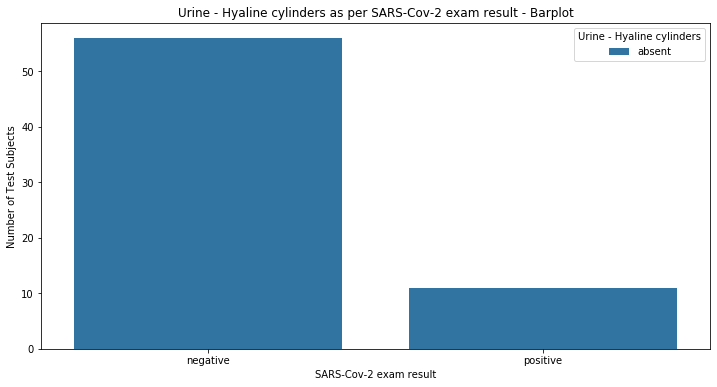

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Hyaline cylinders", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Hyaline cylinders as per SARS-Cov-2 exam result - Barplot')

Urine - Hyaline cylinders were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Granular cylinders as per SARS-Cov-2 exam result - Barplot')

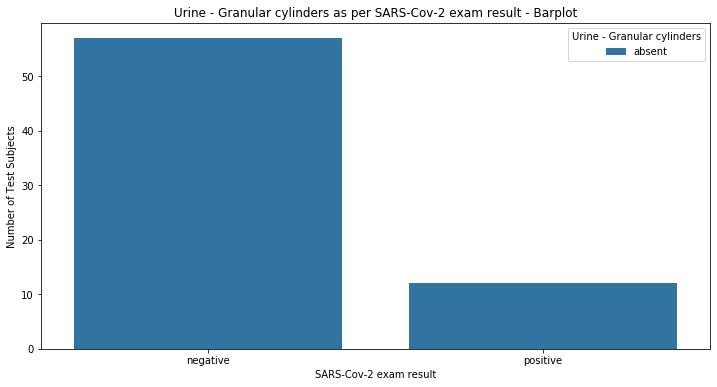

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Granular cylinders", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Granular cylinders as per SARS-Cov-2 exam result - Barplot')

Urine - Granular cylinders were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Yeasts as per SARS-Cov-2 exam result - Barplot')

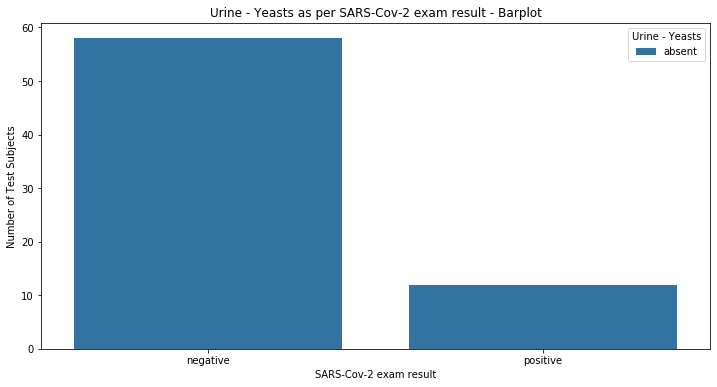

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Yeasts", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Yeasts as per SARS-Cov-2 exam result - Barplot')

Urine - Yeasts were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'Urine - Color as per SARS-Cov-2 exam result - Barplot')

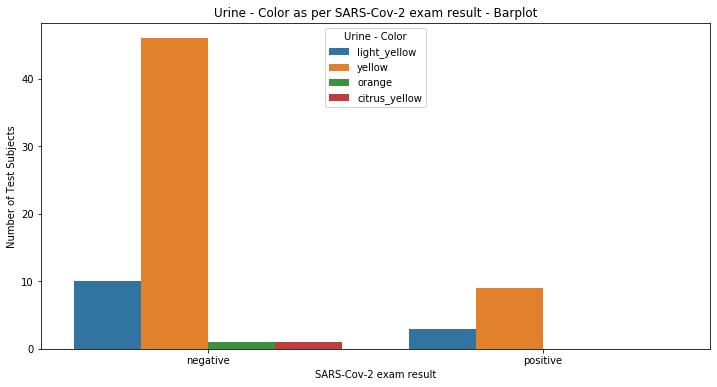

In [134]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Color", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Color as per SARS-Cov-2 exam result - Barplot')

Urine Color - orange & citrus yellow were not detected among COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Relationship (Patient/Normal) - Boxplot')

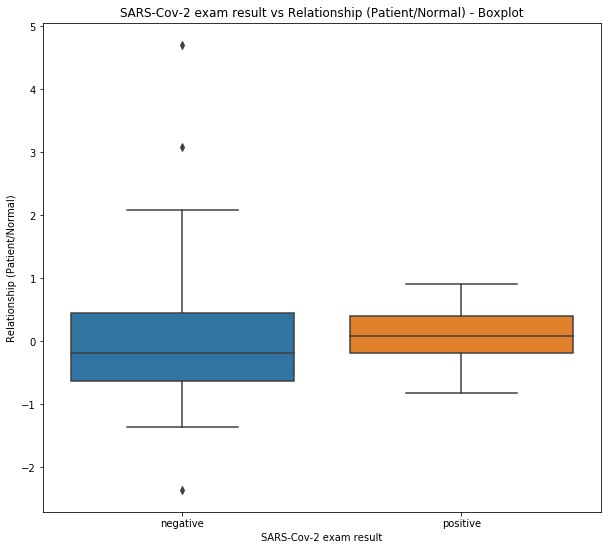

In [135]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Relationship (Patient/Normal)",data=df)
plt.title('SARS-Cov-2 exam result vs Relationship (Patient/Normal) - Boxplot')

The Relationship (Patient/Normal) levels were relatively slightly higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs International normalized ratio (INR) - Boxplot')

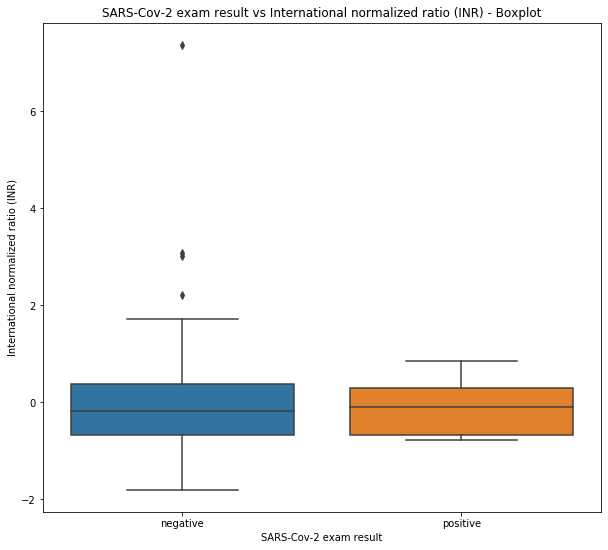

In [136]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="International normalized ratio (INR)",data=df)
plt.title('SARS-Cov-2 exam result vs International normalized ratio (INR) - Boxplot')

The median International normalized ratio (INR) levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lactic Dehydrogenase - Boxplot')

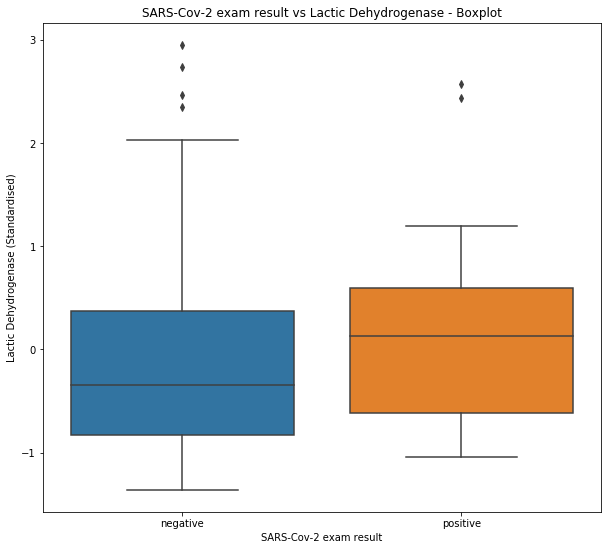

In [137]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Lactic Dehydrogenase",data=df)
plt.ylabel("Lactic Dehydrogenase (Standardised)")
plt.title('SARS-Cov-2 exam result vs Lactic Dehydrogenase - Boxplot')

The Lactic Dehydrogenase levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Creatine phosphokinase\xa0(CPK) - Boxplot')

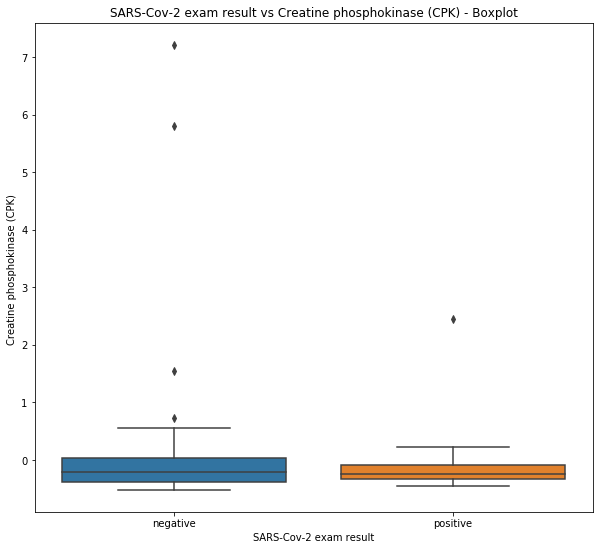

In [138]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Creatine phosphokinase (CPK) ",data=df)
plt.title('SARS-Cov-2 exam result vs Creatine phosphokinase (CPK) - Boxplot')

The median Creatine phosphokinase (CPK) levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Ferritin - Boxplot')

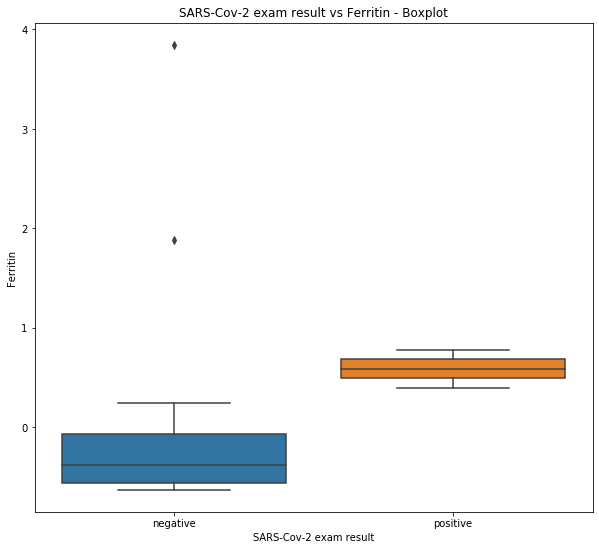

In [139]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Ferritin",data=df)
plt.title('SARS-Cov-2 exam result vs Ferritin - Boxplot')

The Ferritin levels were considerably higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Arterial Lactic Acid - Boxplot')

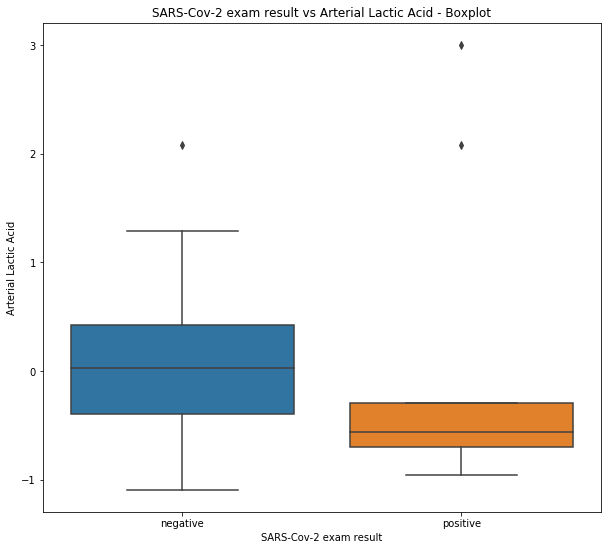

In [140]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Arterial Lactic Acid",data=df)
plt.title('SARS-Cov-2 exam result vs Arterial Lactic Acid - Boxplot')

The Arterial Lactic Acid levels were considerably lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lipase - Boxplot')

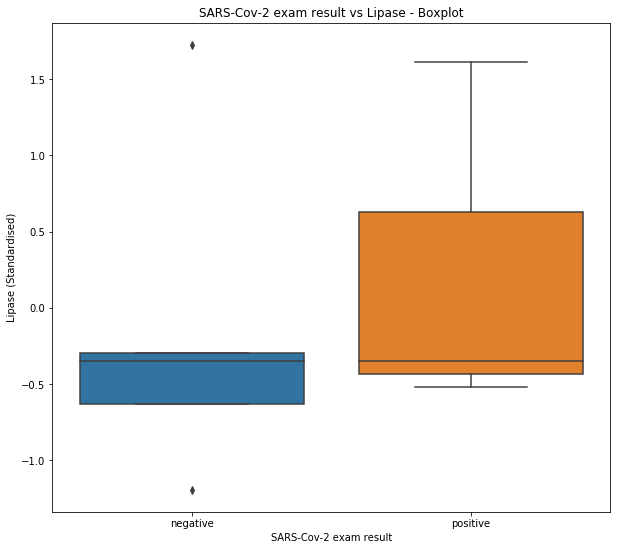

In [141]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Lipase dosage",data=df)
plt.ylabel("Lipase (Standardised)")
plt.title('SARS-Cov-2 exam result vs Lipase - Boxplot')

The Lipase dosage levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hb saturation (arterial blood gases) - Boxplot')

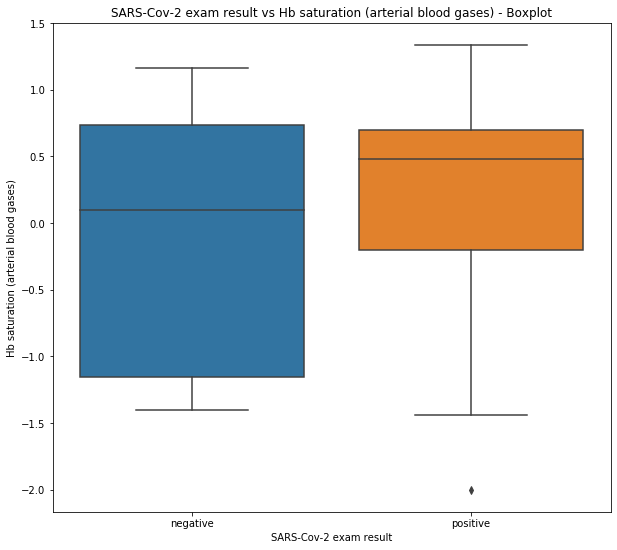

In [142]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hb saturation (arterial blood gases)",data=df)
plt.title('SARS-Cov-2 exam result vs Hb saturation (arterial blood gases) - Boxplot')

The Hb saturation (arterial blood gases) levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pCO2 (arterial blood gas analysis) - Boxplot')

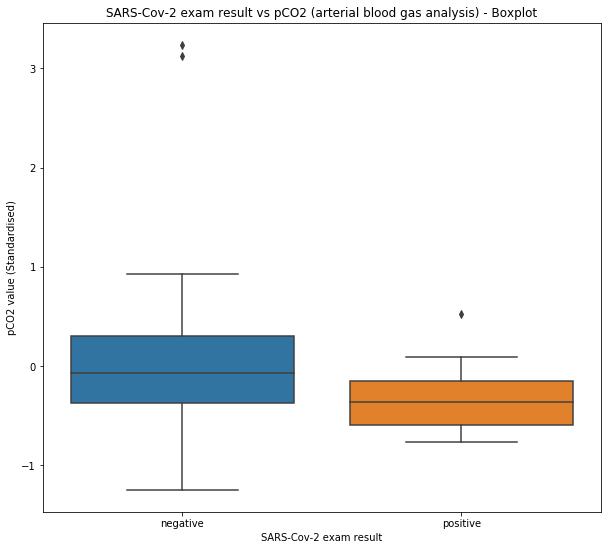

In [143]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pCO2 (arterial blood gas analysis)",data=df)
plt.ylabel("pCO2 value (Standardised)")
plt.title('SARS-Cov-2 exam result vs pCO2 (arterial blood gas analysis) - Boxplot')

The pCO2 (arterial blood gas analysis levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Base excess (arterial blood gas analysis) - Boxplot')

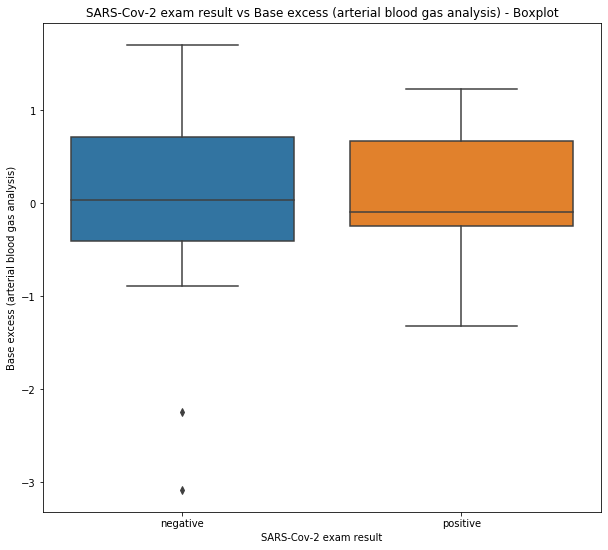

In [144]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Base excess (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Base excess (arterial blood gas analysis) - Boxplot')

The median Base excess (arterial blood gas analysis) levels were almost the same for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pH (arterial blood gas analysis) - Boxplot')

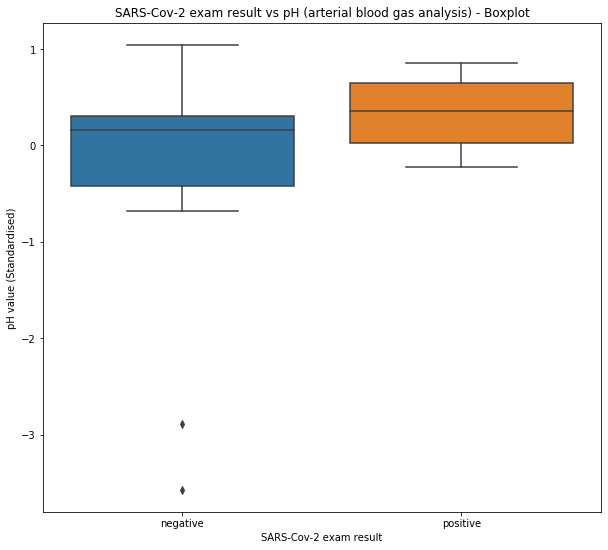

In [145]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pH (arterial blood gas analysis)",data=df)
plt.ylabel("pH value (Standardised)")
plt.title('SARS-Cov-2 exam result vs pH (arterial blood gas analysis) - Boxplot')

The pH (arterial blood gas analysis) levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total CO2 (arterial blood gas analysis) - Boxplot')

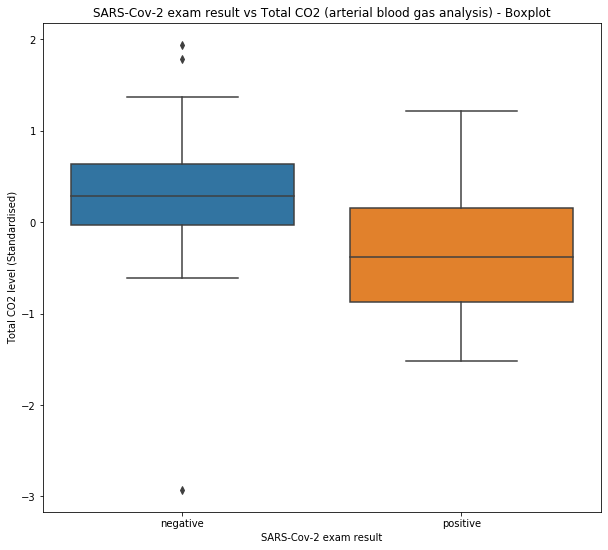

In [146]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total CO2 (arterial blood gas analysis)",data=df)
plt.ylabel("Total CO2 level (Standardised)")
plt.title('SARS-Cov-2 exam result vs Total CO2 (arterial blood gas analysis) - Boxplot')

The median Total CO2 (arterial blood gas analysis) levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs HCO3 (arterial blood gas analysis) - Boxplot')

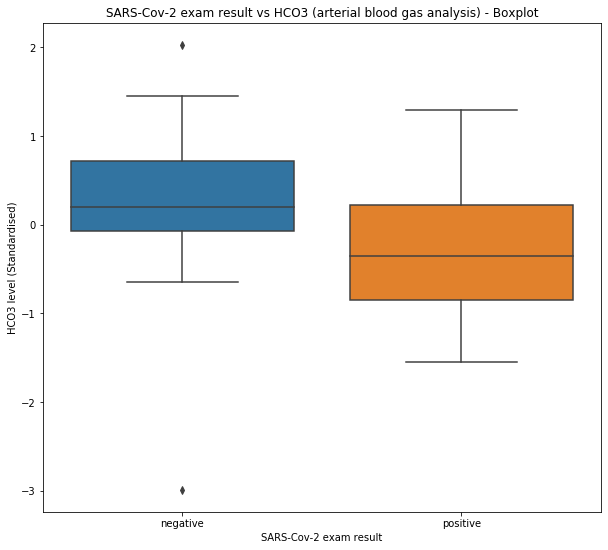

In [147]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="HCO3 (arterial blood gas analysis)",data=df)
plt.ylabel("HCO3 level (Standardised)")
plt.title('SARS-Cov-2 exam result vs HCO3 (arterial blood gas analysis) - Boxplot')

The median Total CO2 (arterial blood gas analysis) levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pO2 (arterial blood gas analysis) - Boxplot')

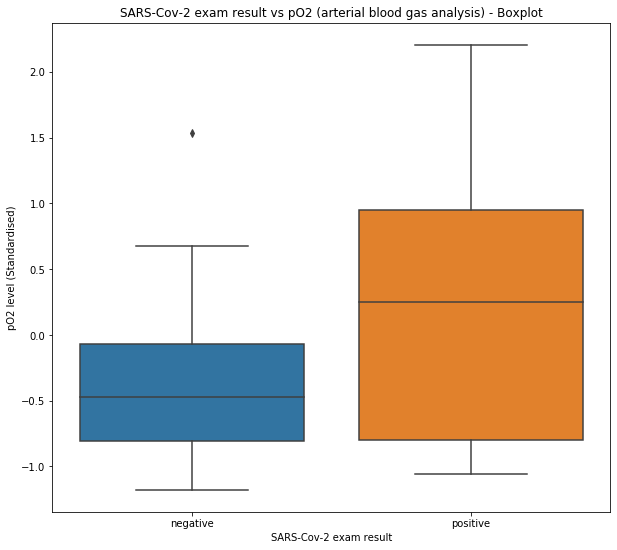

In [148]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pO2 (arterial blood gas analysis)",data=df)
plt.ylabel("pO2 level (Standardised)")
plt.title('SARS-Cov-2 exam result vs pO2 (arterial blood gas analysis) - Boxplot')

The pO2 (arterial blood gas analysis) levels were relatively higher for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Phosphor - Boxplot')

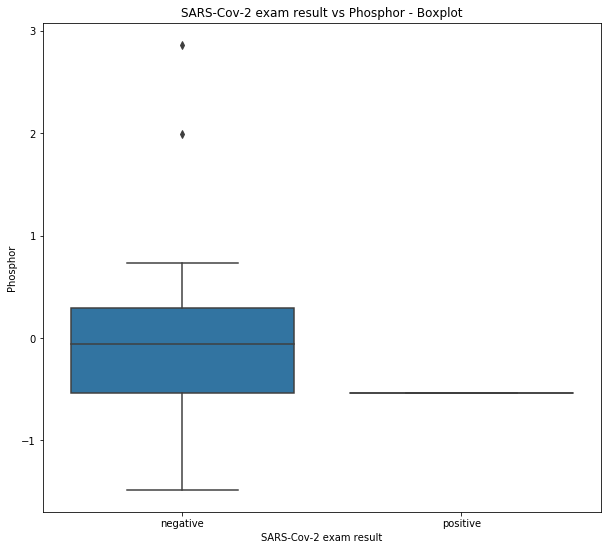

In [149]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Phosphor",data=df)
plt.title('SARS-Cov-2 exam result vs Phosphor - Boxplot')

The median Phosphor levels were relatively lower for COVID-19 positive patients.

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs ctO2 (arterial blood gas analysis) - Boxplot')

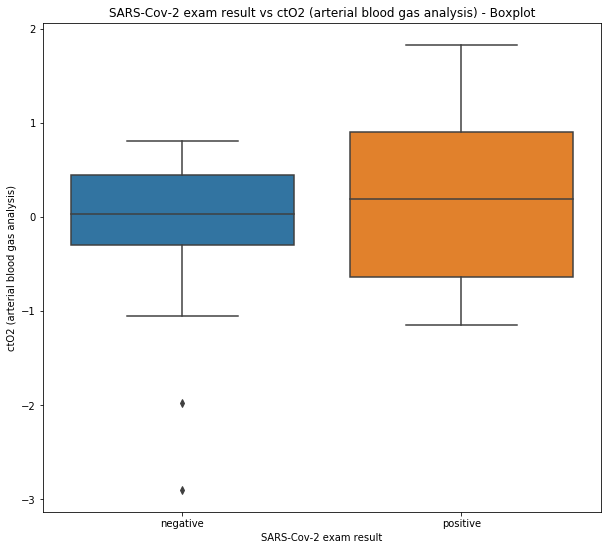

In [150]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="ctO2 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs ctO2 (arterial blood gas analysis) - Boxplot')

The median ctO2 (arterial blood gas analysis) levels were relatively slightly higher for COVID-19 positive patients. Also the variance is relatively higher among COVID-19 positive.

In [85]:
df.isnull().sum()

Patient age quantile                     0
SARS-Cov-2 exam result                   0
Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
                                      ... 
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Unit                                     0
Length: 108, dtype: int64

Let's drop all the columns which have very few entries for machine learning models.

In [86]:
df.drop(columns=["Mycoplasma pneumoniae","Fio2 (venous blood gas analysis)","Urine - Nitrite","Urine - Sugar","Partial thromboplastin time (PTT) ","Prothrombin time (PT), Activity","Vitamin B12","Ferritin","Arterial Lactic Acid","Lipase dosage","D-Dimer","Albumin","Hb saturation (arterial blood gases)","pCO2 (arterial blood gas analysis)","HCO3 (arterial blood gas analysis)","pO2 (arterial blood gas analysis)","Arteiral Fio2","Phosphor","ctO2 (arterial blood gas analysis)"],axis=1,inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   object 
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9   Leukocytes         

Let's extarct columns which have sufficient number of non-null entries for the COVID-19 prediction model.

In [88]:
df_covid = df[["Patient age quantile","SARS-Cov-2 exam result","Hematocrit","Hemoglobin","Platelets","Mean platelet volume ","Red blood Cells","Lymphocytes","Mean corpuscular hemoglobin concentration (MCHC)","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Influenza A","Influenza B","Rhinovirus/Enterovirus","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Metapneumovirus","Neutrophils","Proteina C reativa mg/dL","Influenza B, rapid test","Influenza A, rapid test","Unit"]]

In [89]:
df_covid.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Rhinovirus/Enterovirus,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Metapneumovirus,Neutrophils,Proteina C reativa mg/dL,"Influenza B, rapid test","Influenza A, rapid test",Unit
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,detected,not_detected,not_detected,not_detected,not_detected,-0.619086,-0.147895,negative,negative,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,0


In [90]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   object 
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9   Leukocytes         

In [91]:
#Let's look at the null values present in the dataset
df_covid.isnull().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Influenza A                                         4290
Influenza B                    

In [92]:
df_covid.shape

(5644, 28)

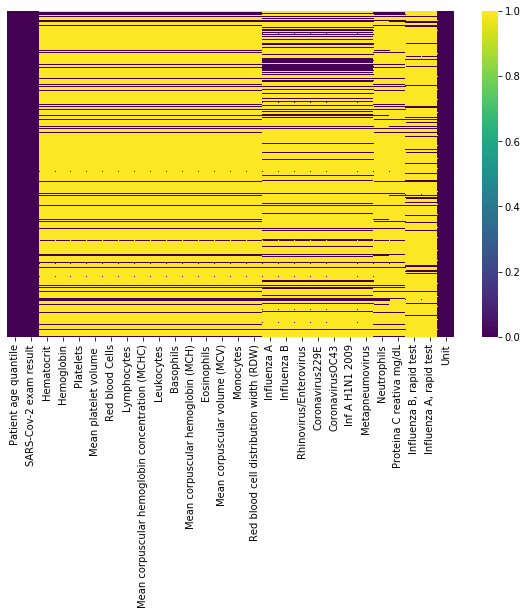

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(df_covid.isnull(),yticklabels=False,cmap="viridis")

In [94]:
df_covid.shape

(5644, 28)

In [95]:
# Let's drop the null value cases for the model
df_covid.dropna(inplace=True)
df_covid.shape

(66, 28)

In [96]:
df_covid["SARS-Cov-2 exam result"].value_counts()

negative    56
positive    10
Name: SARS-Cov-2 exam result, dtype: int64

In [97]:
df_covid.skew()

Patient age quantile                               -0.329444
Hematocrit                                          0.090443
Hemoglobin                                          0.034353
Platelets                                           0.737633
Mean platelet volume                                1.198895
Red blood Cells                                    -0.072275
Lymphocytes                                         0.882810
Mean corpuscular hemoglobin concentration (MCHC)   -0.275022
Leukocytes                                          1.091446
Basophils                                           0.377933
Mean corpuscular hemoglobin (MCH)                  -0.547406
Eosinophils                                         3.183594
Mean corpuscular volume (MCV)                       0.239871
Monocytes                                           0.728977
Red blood cell distribution width (RDW)             0.867259
Neutrophils                                        -0.186199
Proteina C reativa mg/dL

Let's encode all categorical variables for the model.

In [98]:
cat = pd.get_dummies(df_covid)
cat

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive"
1,17,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,0,1,0,1,0,1,1,0,1,0
30,9,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,...,0,1,0,1,0,1,1,0,1,0
71,16,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,...,0,1,0,1,0,1,0,1,1,0
84,9,-0.656139,-0.899524,-0.391795,0.796029,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,...,0,1,0,1,1,0,1,0,1,0
87,17,0.442512,0.228284,-0.680717,0.459449,0.736697,-1.165688,-0.652057,-0.589947,-0.529226,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2,-1.091022,-0.774212,-0.643031,-0.999063,-0.303494,0.164843,1.140354,-0.573250,-0.223767,...,0,1,0,1,0,1,1,0,1,0
5066,19,-0.267033,-0.398276,-0.730964,0.908221,0.278308,-1.182746,-0.552476,-0.080696,-1.140144,...,0,1,0,1,0,1,1,0,1,0
5196,11,-0.450142,0.040316,-0.492289,-0.774677,-0.409276,-1.378914,1.936978,0.038964,-0.529226,...,0,1,0,1,0,1,1,0,1,0
5564,12,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,0.081693,...,0,1,0,1,0,1,1,0,1,0


In [99]:
cat.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils',
       'Proteina C reativa mg/dL', 'Unit', 'SARS-Cov-2 exam result_negative',
       'SARS-Cov-2 exam result_positive', 'Influenza A_not_detected',
       'Influenza B_detected', 'Influenza B_not_detected',
       'Rhinovirus/Enterovirus_detected',
       'Rhinovirus/Enterovirus_not_detected', 'Coronavirus229E_detected',
       'Coronavirus229E_not_detected', 'CoronavirusOC43_detected',
       'CoronavirusOC43_not_detected', 'Inf A H1N1 2009_detected',
       'Inf A H1N1 2009_not_detected', 'Metapneumovirus_detected',
       'Metapneumovirus_not_detected', 'Influenza B, rapid test_negative',


In [100]:
cat.drop(["SARS-Cov-2 exam result_negative","Influenza A_not_detected","Influenza B_not_detected","Rhinovirus/Enterovirus_not_detected","Coronavirus229E_not_detected","CoronavirusOC43_not_detected","Inf A H1N1 2009_not_detected","Metapneumovirus_not_detected","Influenza B, rapid test_negative","Influenza A, rapid test_negative"],axis=1,inplace=True)

In [101]:
cat.shape

(66, 27)

In [102]:
X=cat.drop("SARS-Cov-2 exam result_positive", axis=1)
y=cat["SARS-Cov-2 exam result_positive"]

In [103]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 1.21140879,  0.28901611, -0.02165674, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [-0.29713801, -0.8549151 , -0.89513373, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 1.02284044,  0.83238276,  0.37537844, ..., -0.12403473,
         3.93700394, -0.12403473],
       ...,
       [ 0.07999869, -0.56893229,  0.0577506 , ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 0.26856704,  1.43294729,  0.77241359, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 0.64570374,  1.37575051,  1.32826338, ..., -0.12403473,
        -0.25400025, -0.12403473]])

Let's do Principal Component Analysis (PCA) for the input features

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (66, 26)
Reduced shape: (66, 2)


Finding the best random state

In [105]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 1 is 0.9545454545454546


In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=50)

In [149]:
print(X_train.shape,"\n",X_test.shape)

(44, 26) 
 (22, 26)


Observing performance of different classifier algorithms

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [151]:
LR = LogisticRegression()#From the GridSearchCVparameter tuning
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()#From the GridSearchCVparameter tuning
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [152]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=50, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.7727272727272727


Cross val score =  0.8166666666666668


roc_auc_score =  0.5705882352941176


Classification Report
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.50      0.20      0.29         5

    accuracy                           0.77        22
   macro avg       0.65      0.57      0.58        22
weighted avg       0.73      0.77      0.73        22



Confusion Matrix 
[[16  1]
 [ 4  1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KN

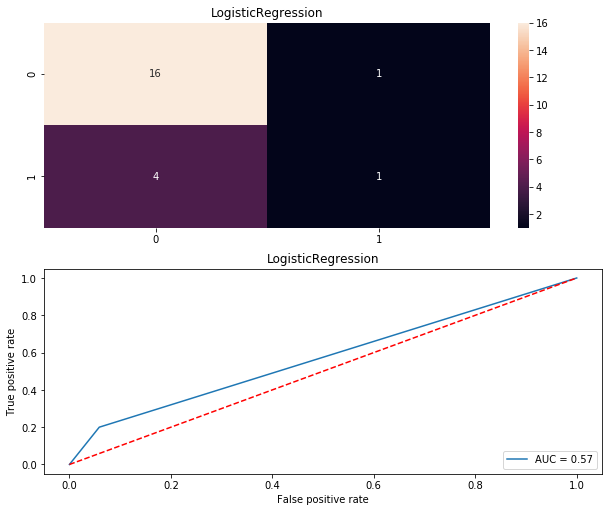

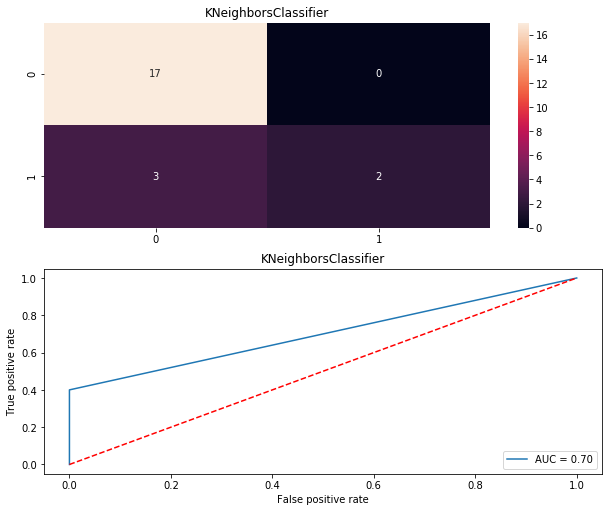

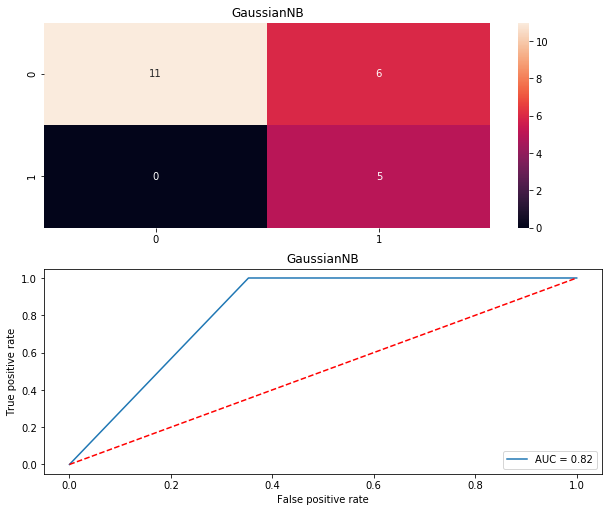

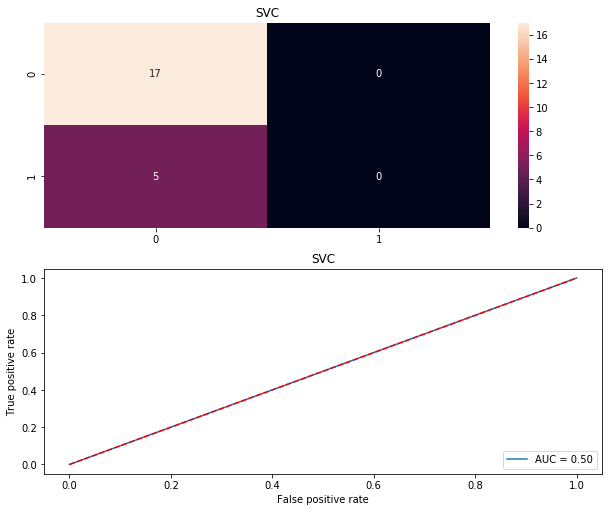

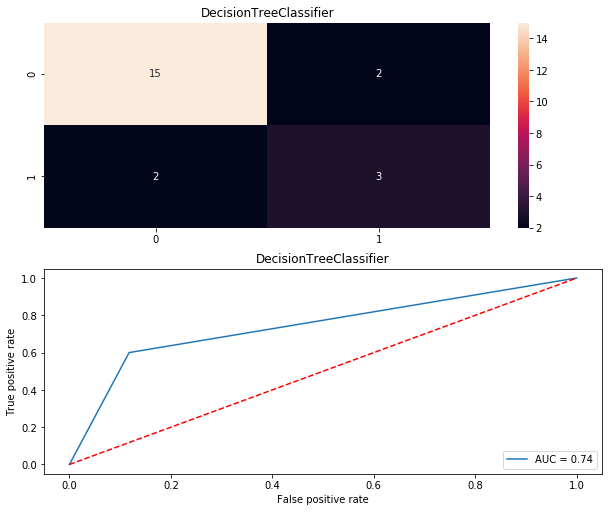

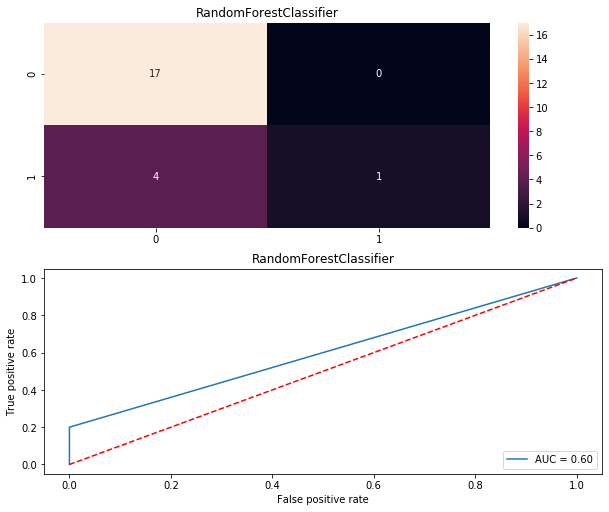

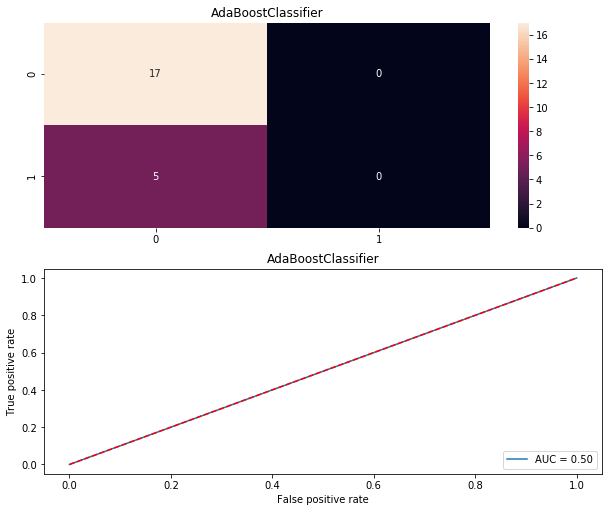

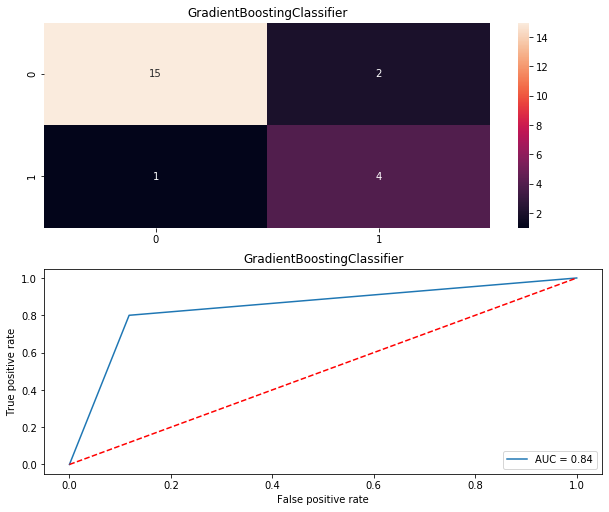

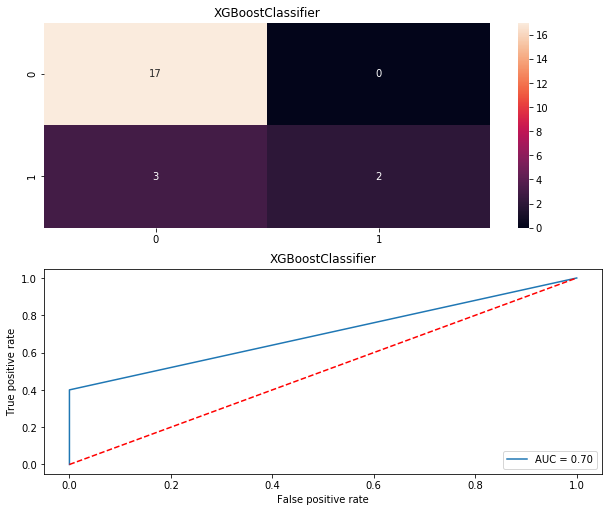

In [154]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [155]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,77.272727,81.666667,57.058824
1,KNeighborsClassifier,86.363636,85.714286,70.000000
2,GaussianNB,72.727273,60.476190,82.352941
3,SVC,77.272727,84.761905,50.000000
4,DecisionTreeClassifier,81.818182,69.523810,74.117647
5,RandomForestClassifier,81.818182,86.190476,60.000000
6,AdaBoostClassifier,77.272727,83.095238,50.000000
7,GradientBoostingClassifier,86.363636,78.333333,84.117647
8,XGBoostClassifier,86.363636,87.619048,70.000000


Clearly XGBoost provides the best generalization performance, let's find the best parameters for it

In [495]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [6,7,8]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
    

In [496]:
XGB = xgb.XGBRegressor(n_estimators=7)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=7, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Saving the model

In [497]:
from sklearn.externals import joblib
joblib.dump(XGB,'COVID-19_Prediction.pkl')

['COVID-19_Prediction.pkl']

# Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases

In [352]:
df_model = df[(df["Unit"]==1)|(df["Unit"]==2)|(df["Unit"]==3)]
df_model

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),Unit
8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,...,NaN,NaN,-0.089481,0.296546,0.907723,-0.267856,NaN,NaN,NaN,2
30,9,negative,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55,19,negative,0.625621,0.353596,-0.127997,0.796029,0.190156,-1.592140,-0.851210,0.556563,...,NaN,NaN,-0.360905,0.126787,NaN,NaN,NaN,NaN,NaN,2
69,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,19,negative,-0.518807,-0.586244,0.952319,0.010677,-0.144821,0.429243,-0.353319,-0.748566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,18,positive,0.602732,0.353596,-1.082694,1.581381,0.119635,-0.943933,-0.751633,-1.255035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5557,7,negative,-1.388574,-1.588740,1.668342,-2.120995,-1.008708,0.437772,-1.349101,-0.509246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5564,12,positive,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,...,NaN,NaN,-0.089481,-0.665422,-0.699774,-0.284021,-0.131460,0.704654,-0.796872,1
5566,14,positive,1.106281,1.042812,-0.253615,-0.438097,0.930631,-0.483364,0.044991,0.155841,...,NaN,NaN,0.000994,0.296546,NaN,-0.327126,-1.327899,-0.224899,-1.519125,1


In [353]:
df_model.isnull().sum()

Patient age quantile                           0
SARS-Cov-2 exam result                         0
Hematocrit                                    41
Hemoglobin                                    41
Platelets                                     41
                                            ... 
Creatine phosphokinase (CPK)                 135
Base excess (arterial blood gas analysis)    148
pH (arterial blood gas analysis)             148
Total CO2 (arterial blood gas analysis)      148
Unit                                           0
Length: 89, dtype: int64

In [354]:
df_model = df_model[df["SARS-Cov-2 exam result"]=="positive"]
df_model

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),Unit
284,16,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
884,15,positive,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1156,11,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1168,18,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1205,7,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1530,5,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1577,8,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1966,14,positive,1.312279,1.606716,-1.685661,1.244801,1.547694,0.386598,1.339507,-0.445242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3057,17,positive,0.167850,0.165628,-1.007324,0.571643,-0.021409,-0.082499,0.044991,-0.843181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3085,16,positive,0.648510,0.478908,-0.793773,-0.662483,0.719067,-0.338371,-0.452899,-0.114090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [355]:
df_model.isnull().sum()

Patient age quantile                          0
SARS-Cov-2 exam result                        0
Hematocrit                                    9
Hemoglobin                                    9
Platelets                                     9
                                             ..
Creatine phosphokinase (CPK)                 37
Base excess (arterial blood gas analysis)    40
pH (arterial blood gas analysis)             40
Total CO2 (arterial blood gas analysis)      40
Unit                                          0
Length: 89, dtype: int64

In [356]:
df_model.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 284 to 5566
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              52 non-null     int64  
 1   SARS-Cov-2 exam result                            52 non-null     object 
 2   Hematocrit                                        43 non-null     float64
 3   Hemoglobin                                        43 non-null     float64
 4   Platelets                                         43 non-null     float64
 5   Mean platelet volume                              42 non-null     float64
 6   Red blood Cells                                   43 non-null     float64
 7   Lymphocytes                                       43 non-null     float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  43 non-null     float64
 9   Leukocytes         

In [364]:
test=df_model[["Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Respiratory Syncytial Virus","Influenza A","Influenza B","Parainfluenza 1","CoronavirusNL63","Rhinovirus/Enterovirus","Coronavirus HKU1","Parainfluenza 3","Chlamydophila pneumoniae","Adenovirus","Parainfluenza 4","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Bordetella pertussis","Metapneumovirus","Parainfluenza 2","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Unit"]]

In [365]:
test.head()

,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Unit
284,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,1
884,0.334989,-0.66695,0.22628,-0.456613,-0.978899,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,1.282118,0.974759,-0.247246,0.160114,1
1156,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,1
1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [366]:
test.isnull().sum()

Mean corpuscular hemoglobin (MCH)           9
Eosinophils                                 9
Mean corpuscular volume (MCV)               9
Monocytes                                   9
Red blood cell distribution width (RDW)     9
Respiratory Syncytial Virus                13
Influenza A                                13
Influenza B                                13
Parainfluenza 1                            13
CoronavirusNL63                            13
Rhinovirus/Enterovirus                     13
Coronavirus HKU1                           13
Parainfluenza 3                            13
Chlamydophila pneumoniae                   13
Adenovirus                                 13
Parainfluenza 4                            13
Coronavirus229E                            13
CoronavirusOC43                            13
Inf A H1N1 2009                            13
Bordetella pertussis                       13
Metapneumovirus                            13
Parainfluenza 2                   

In [367]:
#Let's drop all the null value rows
test.dropna(inplace=True)
test.shape

(28, 27)

In [368]:
cat = pd.get_dummies(test)
cat

,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Unit,...,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_not_detected,Parainfluenza 4_not_detected,Coronavirus229E_not_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_not_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected
884,0.334989,-0.666950,0.226280,-0.456613,-0.978899,1.282118,0.974759,-0.247246,0.160114,1,...,1,1,1,1,1,1,1,1,1,1
1966,-0.083183,-0.751229,-0.715108,-0.141454,-0.978899,-0.094616,-0.365042,-0.080337,0.918255,3,...,1,1,1,1,1,1,1,1,1,1
4459,0.125903,-0.835508,0.466636,0.593916,0.436405,0.388879,-0.141742,0.217715,0.849333,1,...,1,1,1,1,1,1,1,1,1,1
4524,-0.919529,-0.751229,-1.015552,-0.193981,0.347948,0.110255,-0.141742,-0.461843,0.642567,1,...,1,1,1,1,1,1,1,1,1,1
4535,-0.501356,-0.709090,-0.394636,0.698968,-1.067355,-0.348656,-0.067309,-0.130012,0.229035,2,...,1,1,1,1,1,1,1,1,1,1
4769,0.648619,-0.709090,0.066045,0.515126,-0.890442,0.020112,-0.588343,-0.110142,0.366879,1,...,1,1,1,1,1,1,1,1,1,1
4899,0.021361,-0.582671,-0.334546,3.377816,0.967144,0.159424,0.453725,-0.306856,-0.150035,3,...,1,1,1,1,1,1,1,1,1,1
4978,-1.442245,-0.540532,-1.195818,0.199968,0.967144,-0.438800,0.453725,-0.314804,-0.012191,1,...,1,1,1,1,1,1,1,1,1,1
5002,-0.083183,0.175837,-0.134251,0.987864,-0.448160,-0.955075,0.453725,-0.116103,1.848701,1,...,1,1,1,1,1,1,1,1,1,1
5004,0.439533,-0.709090,0.446606,0.830284,-0.536617,-0.717424,-0.737209,-0.330700,-0.046652,2,...,1,1,1,1,1,1,1,1,1,1


In [369]:
X=cat.drop("Unit", axis=1)
y=cat["Unit"]

In [370]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 5.62405840e-01,  5.00984850e-02,  4.98427896e-01,
        -1.00201787e+00, -7.90663923e-01,  1.60046604e+00,
         2.16949058e+00, -7.39799198e-01, -2.67389498e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.61199252e-01, -3.50689557e-01, -3.63505550e-01,
        -6.34465392e-01, -7.90663923e-01, -3.99691442e-01,
        -6.19854422e-01, -5.56350819e-01,  9.00780119e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

Let's do Principal Component Analysis (PCA) for the input features

In [371]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (28, 26)
Reduced shape: (28, 2)


Finding best random_state for Linear Regression Model

In [373]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 68 is 1.0


In [376]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=68)

In [377]:
print(X_train.shape,"\n",X_test.shape)

(21, 26) 
 (7, 26)


Observing performance of different classifier algorithms

In [385]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [386]:
LR = LogisticRegression()#From the GridSearchCVparameter tuning
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()#From the GridSearchCVparameter tuning
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [387]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [388]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=68, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  1.0


Cross val score =  0.6428571428571428


Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Confusion Matrix 
[[7]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=N

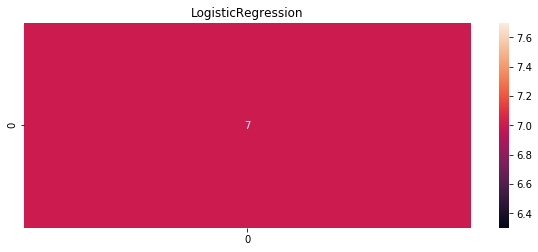

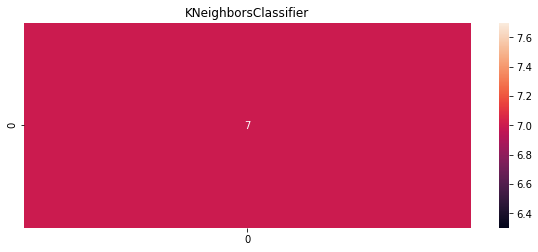

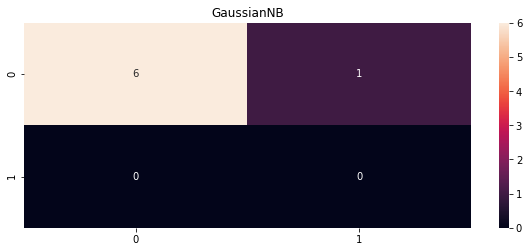

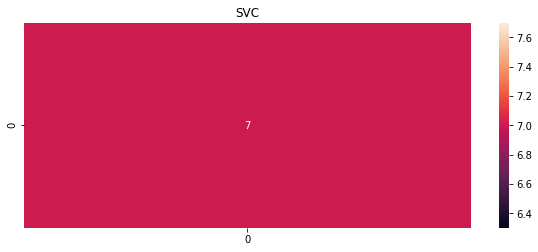

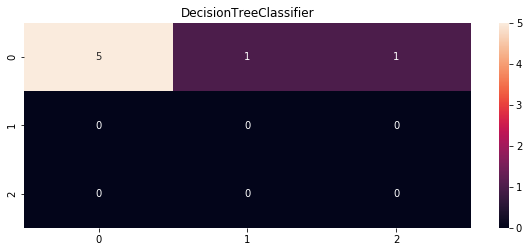

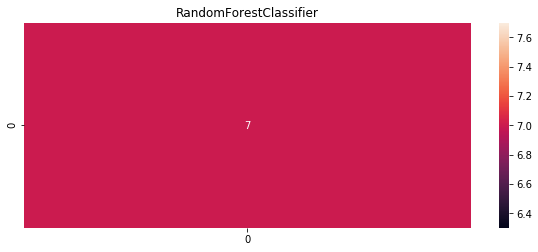

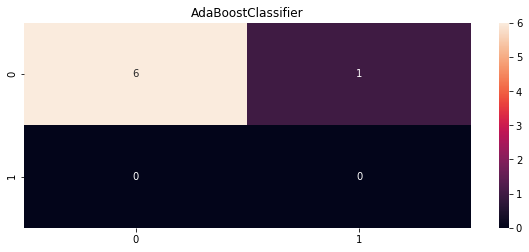

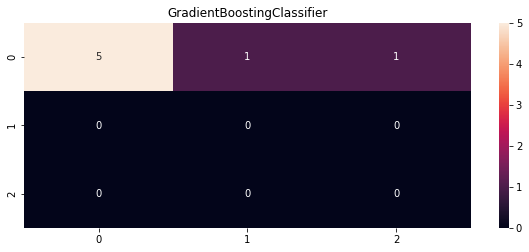

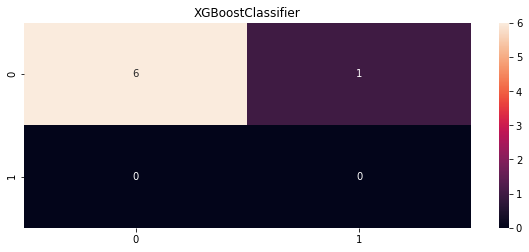

In [389]:
Model = []
score = []
cvs = []
#rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    #roc_auc = auc( false_positive_rate, true_positive_rate)
    #print("roc_auc_score = ",roc_auc)
    #rocscore.append(roc_auc*100)
    #print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    #plt.subplot(912)
    #plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc = 'lower right')
    #plt.ylabel("True positive rate")
    #plt.xlabel("False positive rate")
    print("\n\n")

In [390]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs})
result

,Model,Accuracy Socre,Cross val score
0,LogisticRegression,100.000000,64.285714
1,KNeighborsClassifier,100.000000,64.285714
2,GaussianNB,85.714286,60.714286
3,SVC,100.000000,64.285714
4,DecisionTreeClassifier,71.428571,57.142857
5,RandomForestClassifier,100.000000,64.285714
6,AdaBoostClassifier,85.714286,53.571429
7,GradientBoostingClassifier,71.428571,53.571429
8,XGBoostClassifier,85.714286,60.714286


Random Forest classifier has the best generalization performance, so let's find the best parameters for it

In [396]:
from sklearn.model_selection import GridSearchCV
parameters = {
                      'n_estimators': [151,152,153,154]
             }
grid = GridSearchCV(estimator=RFC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [397]:
RFC = RandomForestClassifier(n_estimators=151)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=151,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

parameter set, model retrained with new parameters, now let's save the model

In [399]:
from sklearn.externals import joblib
joblib.dump(RFC,'COVID_Patient_Unit-Ward_Prediction.pkl')

['COVID_Patient_Unit-Ward_Prediction.pkl']

In [163]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 109 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   SARS-Cov-2 exam result                            5644 non-null   object 
 3   Hematocrit                                        603 non-null    float64
 4   Hemoglobin                                        603 non-null    float64
 5   Platelets                                         602 non-null    float64
 6   Mean platelet volume                              599 non-null    float64
 7   Red blood Cells                                   602 non-null    float64
 8   Lymphocytes                                       602 non-null    float64
 9   Mean corpuscular h